<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_Project3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ÏòÅÌôî Í¥ÄÍ∞ùÏàò ÏòàÏ∏° Í≤ΩÏßÑÎåÄÌöå** (Regression)


https://dacon.io/competitions/open/235536/codeshare/4158?page=1&dtype=recent

## **1. Îç∞Ïù¥ÌÑ∞ Î∞è ÌîºÏ≤ò ÌôïÏù∏**

ÌïÑÏöîÌïú Î™®Îìà ÏûÑÌè¨Ìä∏

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# matplotlib ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [4]:
#ÌïúÍ∏Ä Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
plt.style.use('fivethirtyeight')
plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus =False)

Ï†úÏ∂úÌååÏùº ÏÉùÏÑ±

In [5]:
submission=pd.read_csv('submission.csv')

Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [6]:
train=pd.read_csv("movies_train.csv")
test=pd.read_csv("movies_test.csv")

Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Î≥ÄÏàò ÌôïÏù∏
* title : ÏòÅÌôîÏùò Ï†úÎ™©
* distributor : Î∞∞Í∏âÏÇ¨
* genre : Ïû•Î•¥
* release_time : Í∞úÎ¥âÏùº
* time : ÏÉÅÏòÅÏãúÍ∞Ñ(Î∂Ñ)
* screening_rat : ÏÉÅÏòÅÎì±Í∏â
* director : Í∞êÎèÖÏù¥Î¶Ñ
* dir_prev_bfnum : Ìï¥Îãπ Í∞êÎèÖÏù¥ Ïù¥ ÏòÅÌôîÎ•º ÎßåÎì§Í∏∞ Ï†Ñ Ï†úÏûëÏóê Ï∞∏Ïó¨Ìïú ÏòÅÌôîÏóêÏÑúÏùò ÌèâÍ∑† Í¥ÄÍ∞ùÏàò(Îã® Í¥ÄÍ∞ùÏàòÍ∞Ä ÏïåÎ†§ÏßÄÏßÄ ÏïäÏùÄ ÏòÅÌôî Ï†úÏô∏)
* dir_prev_num : Ìï¥Îãπ Í∞êÎèÖÏù¥ Ïù¥ ÏòÅÌôîÎ•º ÎßåÎì§Í∏∞ Ï†Ñ Ï†úÏûëÏóê Ï∞∏Ïó¨Ìïú ÏòÅÌôîÏùò Í∞úÏàò(Îã® Í¥ÄÍ∞ùÏàòÍ∞Ä ÏïåÎ†§ÏßÄÏßÄ ÏïäÏùÄ ÏòÅÌôî Ï†úÏô∏)
* num_staff : Ïä§ÌÖùÏàò
* num_actor : Ï£ºÏó∞Î∞∞Ïö∞Ïàò
* box_off_num : Í¥ÄÍ∞ùÏàò

In [6]:
train.head()

title   distributor genre release_time  time screening_rat director  \
0     Í∞úÎì§Ïùò Ï†ÑÏüÅ      Î°ØÎç∞ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏    Ïï°ÏÖò   2012-11-22    96      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ï°∞Î≥ëÏò•   
1       ÎÇ¥Î∂ÄÏûêÎì§        (Ï£º)ÏáºÎ∞ïÏä§   ÎäêÏôÄÎ•¥   2015-11-19   130      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ïö∞ÎØºÌò∏   
2  ÏùÄÎ∞ÄÌïòÍ≤å ÏúÑÎåÄÌïòÍ≤å        (Ï£º)ÏáºÎ∞ïÏä§    Ïï°ÏÖò   2013-06-05   123       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïû•Ï≤†Ïàò   
3   ÎÇòÎäî Í≥µÎ¨¥ÏõêÏù¥Îã§        (Ï£º)NEW   ÏΩîÎØ∏Îîî   2012-07-12   101        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      Íµ¨ÏûêÌôç   
4       Î∂àÎüâÎÇ®ÎÖÄ  ÏáºÎ∞ïÏä§(Ï£º)ÎØ∏ÎîîÏñ¥ÌîåÎ†âÏä§   ÏΩîÎØ∏Îîî   2010-11-04   108       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïã†Í∑ºÌò∏   

   dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0             NaN             0         91          2        23398  
1      1161602.50             2        387          3      7072501  
2       220775.25             4        343          4      6959083  
3        23894.00             2         20          6       217866  
4            1.00             1        251          2       483387

In [7]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò ÌÅ¨Í∏∞ÏôÄ Î≥ÄÏàò ÌôïÏù∏
train.shape

(600, 12)

trainÏùò Í≤ΩÏö∞, 600Í∞úÏùò ÌñâÍ≥º 12Í∞úÏùò columnsÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§.

submissionÏùò Í≤ΩÏö∞, 243Í∞úÏùò ÌñâÍ≥º 2Í∞úÏùò columnsÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§.

-> Ï¶â, 600Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÏºú 243Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ ÏòàÏ∏°ÏùÑ ÏßÑÌñâÌï¥Ïïº ÌïúÎã§.

## **2. EDA**

ÏàòÏπòÌòï Î≥ÄÏàòÏùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏôúÍ≥° Ï†ïÎèÑÎ•º ÏÇ¥Ìé¥Î≥¥Í∏∞ ÏúÑÌï¥ ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî

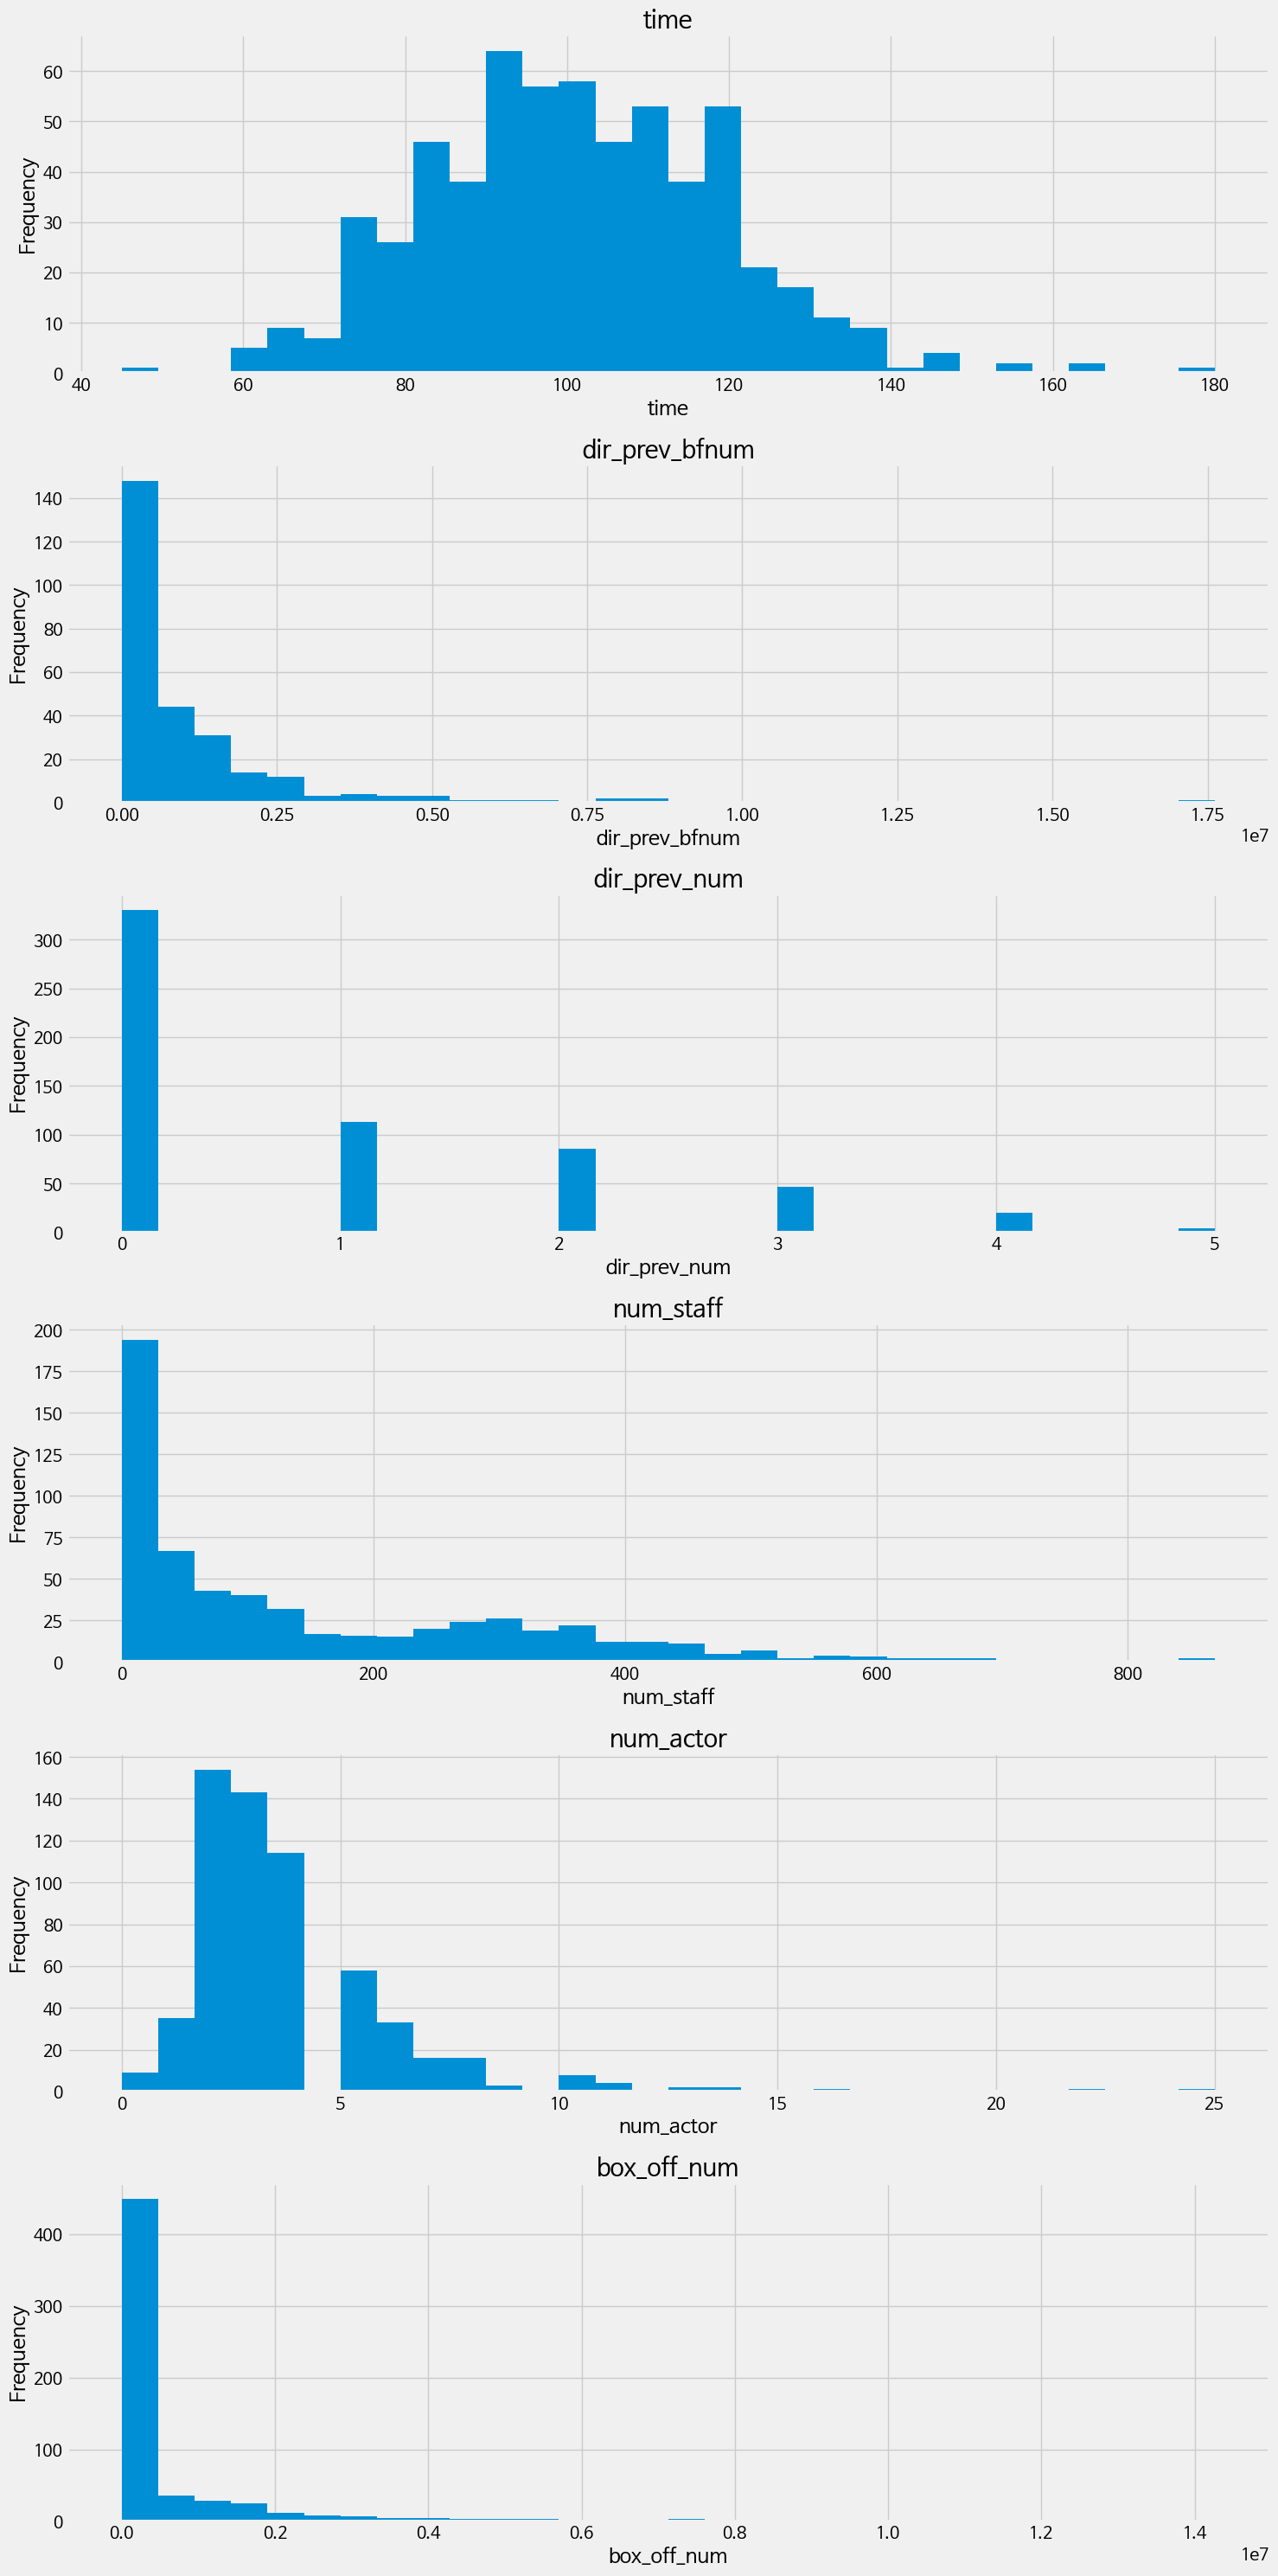

In [7]:
numeric_cols = train.select_dtypes(include='number').columns

# ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(15, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    train[col].hist(bins=30)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

box_off_numÍ≥º ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ

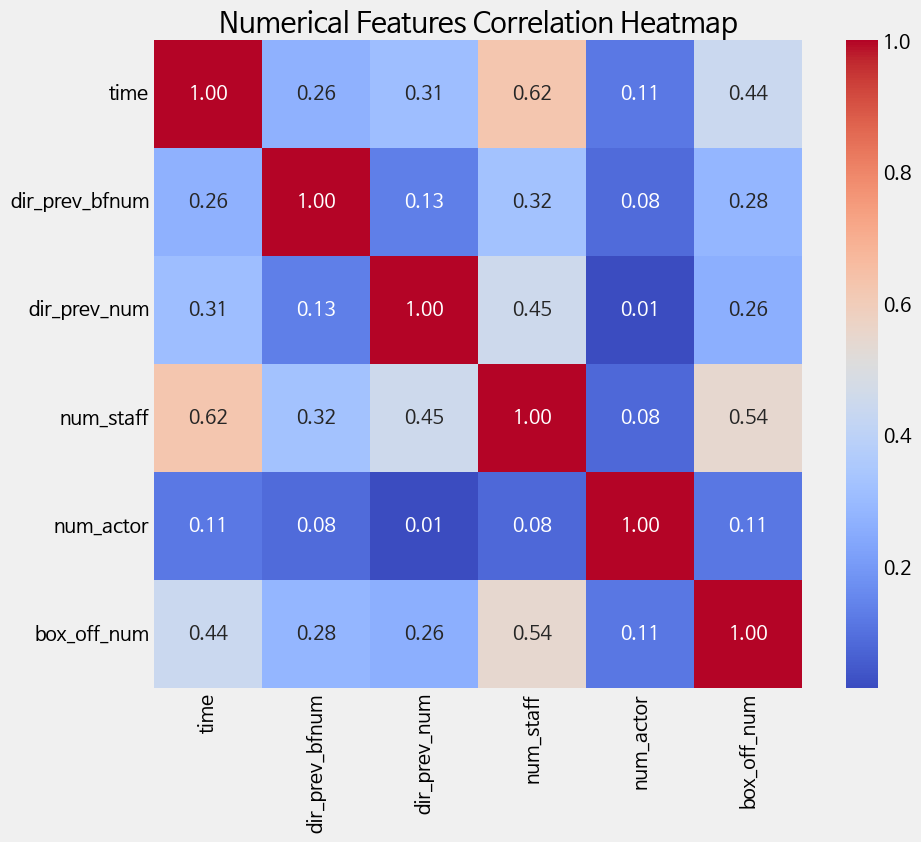

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = train.select_dtypes(include=['int64', 'float64'])
matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

genreÎ≥Ñ ÌèâÍ∑† Í¥ÄÍ∞ùÏàò

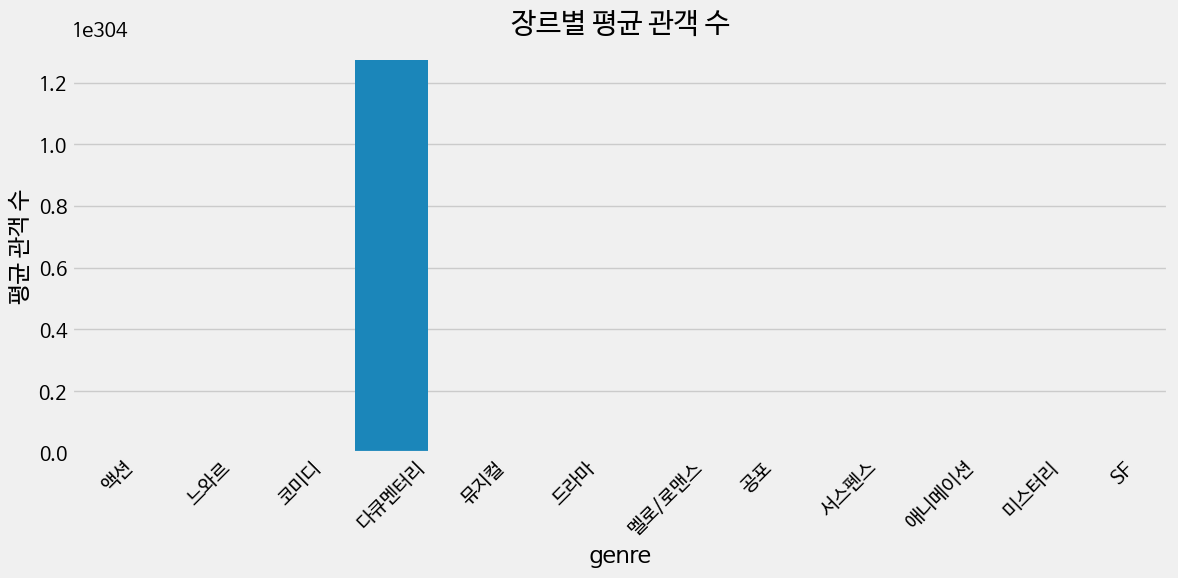

In [9]:
train_copy = train.copy()
train_copy['box_off_num'] = np.expm1(train_copy['box_off_num'])
train_copy['genre'] = train['genre'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=train_copy, x='genre', y='box_off_num', estimator=np.mean, ci=None)
plt.title("Ïû•Î•¥Î≥Ñ ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.ylabel("ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

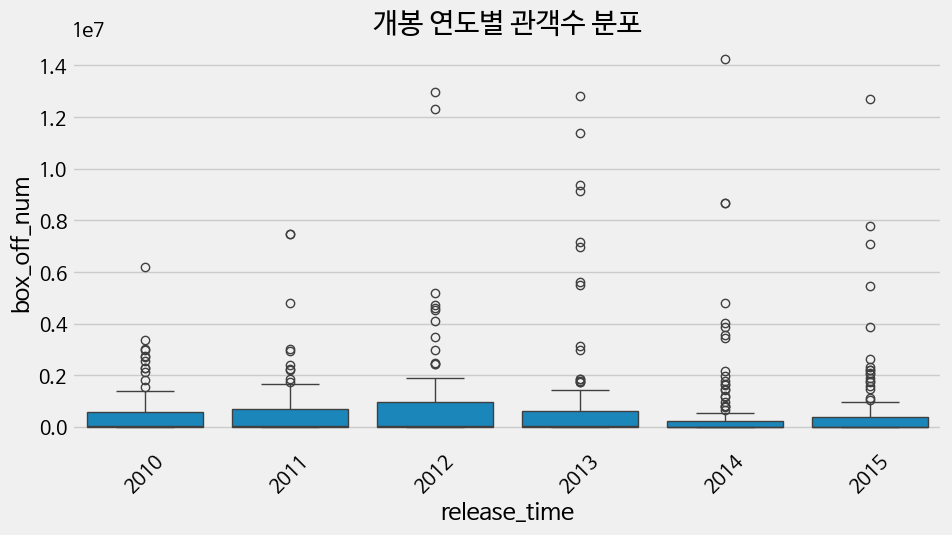

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.to_datetime(train['release_time']).dt.year, y='box_off_num', data=train)
plt.title("Í∞úÎ¥â Ïó∞ÎèÑÎ≥Ñ Í¥ÄÍ∞ùÏàò Î∂ÑÌè¨")
plt.xticks(rotation=45)
plt.show()

screening_rat (ÏÉÅÏòÅÎì±Í∏â)Î≥Ñ Î∂ÑÌè¨

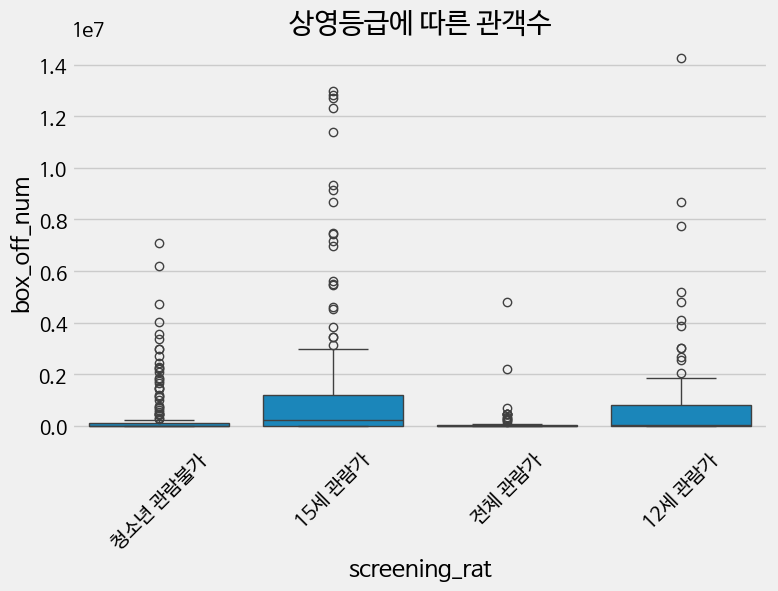

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='screening_rat', y='box_off_num', data=train)
plt.title("ÏÉÅÏòÅÎì±Í∏âÏóê Îî∞Î•∏ Í¥ÄÍ∞ùÏàò")
plt.xticks(rotation=45)
plt.show()

## **3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

In [22]:
#Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


#### 1) Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

ÏúÑÏóêÏÑú Ïù¥ÎØ∏ info( )Î•º Ïù¥Ïö©ÌïòÏó¨ Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÏòÄÏßÄÎßå, isna()Î•º Ïù¥Ïö©ÌïòÏó¨ Í≤∞Ï∏°ÏπòÏóê ÎåÄÌïú Í∞úÏàòÎ•º Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÎèÑÎ°ù ÌïòÏûê.

In [23]:
#Í≤∞Ï∏°Ïπò Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

Í≤∞Ï∏°ÏπòÏùò ÌòïÌÉúÎ•º ÌôïÏù∏Ìï¥Î≥¥Îãà, Ïù¥Îì§Ïùò ÌòïÌÉúÎäî NaNÏùò Í≤∞Ï∏°Í∞í ÌòïÌÉúÎ°ú ÎÇòÌÉÄÎÇ®ÏùÑ Ïïå Ïàò ÏûàÎã§.

-> dir_prev_bfnumÏùò nullÍ∞íÏù¥ Îç∞Ïù¥ÌÑ∞ ÏàòÏùò Ï†àÎ∞ò Ïù¥ÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÍ≥†, Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Î•º Í∞ÄÏßÄÎäî dir_prev_num Î≥ÄÏàòÍ∞Ä Ï°¥Ïû¨ÌïòÎØÄÎ°ú Ïù¥ Î≥ÄÏàòÎäî Ï†úÍ±∞ÌïúÎã§.

- dir_prev_bfnum : Í≤∞Ï∏°Ïπò Ï°¥Ïû¨. Í∞êÎèÖÏùò Ï†ÑÏûëÏù¥ ÏóÜÎäî Í≤ΩÏö∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í≤∞Ï∏°Í∞íÏùÑ 0ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎäî ÏûëÏóÖ ÏàòÌñâ Í∞ÄÎä•ÌïòÏßÄÎßå Ïù¥Î≤à Í≤ΩÏö∞ÏóêÎäî Ï†úÍ±∞ÌïúÎã§.

In [24]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
train=train.drop(['dir_prev_bfnum'],axis=1)
test=test.drop(['dir_prev_bfnum'],axis=1)

#### 2) ÌïÑÏöîÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞

- title: Î™®Îç∏ Ï†ÅÏö©Ïóê ÌÅ∞ ÏùòÎØ∏Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ï†úÍ±∞
  - ÌïòÏßÄÎßå Ïù¥ Í≤ΩÏö∞ Ï†úÏ∂úÌååÏùº submission.csvÏôÄ test.csvÏùò 'title' Î≥ÄÏàòÏùò ÏàúÏÑúÍ∞Ä Í∞ôÏïÑÏïºÎßå Ï†úÍ±∞Í∞Ä Í∞ÄÎä•Ìï®

In [25]:
print((test['title'].values == submission['title'].values).all())

True


ÏàúÏÑúÍ∞Ä Í∞ôÏúºÎØÄÎ°ú Ï†úÍ±∞ÌïúÎã§.

In [26]:
train=train.drop(['title'],axis=1)
test=test.drop(['title'],axis=1)

#### 3) Ïù¥Î¶ÑÏù¥ Îã§Î•∏ ÎèôÏùº Î≥ÄÏàò Ï≤òÎ¶¨

- distributor : NEWÏôÄ ÏãúÎÑ§ÎßàÎã¨ Î∞∞Í∏âÏÇ¨Í∞Ä (Ï£º)NEW, ÏãúÎÑ§Îßà Îã¨ Ïù¥ÎùºÎäî Îã§Î•∏ Ïù¥Î¶ÑÏúºÎ°ú Îì§Ïñ¥Í∞Ñ Í≤ÉÏù¥ ÌôïÏù∏Îê®. ÌõÑÏûê Îç∞Ïù¥ÌÑ∞Ïùò Î∞∞Í∏âÏÇ¨ Ï†ïÎ≥¥Î•º Ï†ÑÏûê Ï†ïÎ≥¥Î°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÎäî ÏûëÏóÖ ÏàòÌñâ

1. distributor -> ÏãúÎÑ§ÎßàÎã¨, ÏãúÎÑ§Îßà Îã¨ÏùÄ Í∞ôÏùÄ Î∞∞Í∏âÏÇ¨

In [27]:
print(train[train['distributor']=='ÏãúÎÑ§Îßà Îã¨'])

    distributor  genre release_time  time screening_rat director  \
107       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2012-07-26   118       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÍπÄÍ≤ΩÎßå   
108       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2012-04-26    98       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä       Í≤ΩÏàú   
167       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2013-03-28    75        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä     ÏßÄÏú®Ïä§Îãò   
212       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2010-09-09    95        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      Í∂åÏö∞Ï†ï   
216       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2013-01-24    89       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Î∞ïÎ∞∞Ïùº   
497       ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2011-01-13    93       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ï†ïÌò∏ÌòÑ   

     dir_prev_num  num_staff  num_actor  box_off_num  
107             0          6          0          652  
108             2          4         10         2119  
167             0         11          0        10942  
212             0          7          3         2418  
216             0          6          2         1240

In [28]:
print(train[train['distributor']=='ÏãúÎÑ§ÎßàÎã¨'])

    distributor  genre release_time  time screening_rat director  \
204        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2014-10-23    77       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïù¥ÏÉÅÌò∏   
274        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2014-03-06    92       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÌôçÎ¶¨Í≤Ω   
342        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2013-08-15    92        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä       Í∂åÌö®   
363        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2011-09-01    87       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÍπÄÏÑ±Í∑†   
407        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2014-10-23    77       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïù¥ÏÉÅÌò∏   
425        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2011-11-24   136        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      Ïù¥Í∞ïÌòÑ   
447        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2014-05-15    94       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÌÉúÏ§ÄÏãù   
534        ÏãúÎÑ§ÎßàÎã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2015-07-16   102       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Î∞ïÎ∞∞Ïùº   
545        ÏãúÎÑ§ÎßàÎã¨    ÎìúÎùºÎßà   2012-11-15    45      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä     Ïù¥ÏÜ°Ìù¨Ïùº   
577        ÏãúÎÑ§ÎßàÎã¨  Î

In [29]:
list_cinemadal_train = train[train['distributor']=='ÏãúÎÑ§Îßà Îã¨'].index
list_cinemadal_test = test[test['distributor']=='ÏãúÎÑ§Îßà Îã¨'].index

2. distributor -> NEW, (Ï£º)NEWÎäî Í∞ôÏùÄ Î∞∞Í∏âÏÇ¨

In [30]:
print(train[train['distributor']=='NEW'])

    distributor   genre release_time  time screening_rat director  \
39          NEW  Î©úÎ°ú/Î°úÎß®Ïä§   2012-02-29   121       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ï†ÑÍ≥ÑÏàò   
90          NEW     ÎìúÎùºÎßà   2014-05-14   132      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÍπÄÎåÄÏö∞   
97          NEW   Ïï†ÎãàÎ©îÏù¥ÏÖò   2013-11-21   100      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ïó∞ÏÉÅÌò∏   
183         NEW      Í≥µÌè¨   2010-07-28    84       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïú†ÏÑ†Îèô   
358         NEW      Ïï°ÏÖò   2011-09-29   119      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÌóàÏ¢ÖÌò∏   
389         NEW     ÎìúÎùºÎßà   2013-11-07   108      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ï†ÑÍ∑úÌôò   
397         NEW     ÏΩîÎØ∏Îîî   2010-12-22   111       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÍπÄÏòÅÌÉÅ   
468         NEW     ÏΩîÎØ∏Îîî   2012-06-21   115       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Î∞ïÏ≤†Í¥Ä   

     dir_prev_num  num_staff  num_actor  box_off_num  
39              2        315          2      1726227  
90              4        379          4      1441990  
97              0        

In [31]:
print(train[train['distributor']=='(Ï£º)NEW'])

    distributor   genre release_time  time screening_rat director  \
3        (Ï£º)NEW     ÏΩîÎØ∏Îîî   2012-07-12   101        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      Íµ¨ÏûêÌôç   
28       (Ï£º)NEW     ÎäêÏôÄÎ•¥   2010-03-18    93      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÍπÄÏ≤†Ìïú   
48       (Ï£º)NEW      Ïï°ÏÖò   2014-11-26   112       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä       ÏµúÌò∏   
67       (Ï£º)NEW     ÎìúÎùºÎßà   2015-11-25   106       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ï†ïÍ∏∞Ìõà   
86       (Ï£º)NEW     ÎìúÎùºÎßà   2012-12-19   120       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ï†ïÍ∏∞Ìõà   
104      (Ï£º)NEW     ÎìúÎùºÎßà   2011-06-23   121      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ï†ÑÏû¨Ìôç   
122      (Ï£º)NEW     ÎìúÎùºÎßà   2013-12-18   127       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      ÏñëÏö∞ÏÑù   
131      (Ï£º)NEW     ÎìúÎùºÎßà   2012-09-06   104      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÍπÄÍ∏∞Îçï   
164      (Ï£º)NEW     ÎìúÎùºÎßà   2015-09-24   121      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÌôçÏÉÅÏàò   
190      (Ï£º)NEW     ÎìúÎùºÎßà   2012-01-18   100       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ï†ïÏßÄÏòÅ   

In [32]:
list_new_train = train[train['distributor']=='(Ï£º)NEW'].index
list_new_test = test[test['distributor']=='(Ï£º)NEW'].index

1. 'ÏãúÎÑ§Îßà Îã¨' -> 'ÏãúÎÑ§ÎßàÎã¨'Î°ú Î≥ÄÍ≤Ω
2. '(Ï£º)NEW' -> 'NEW'Î°ú Î≥ÄÍ≤Ω

In [33]:
test.head()

distributor   genre release_time  time screening_rat director  dir_prev_num  \
0      ÏãúÎÑ§ÎßàÏÑúÎπÑÏä§     ÎäêÏôÄÎ•¥   2010-01-07   125      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÍπÄÌòïÏ§Ä             2   
1      (Ï£º)ÏáºÎ∞ïÏä§  Î©úÎ°ú/Î°úÎß®Ïä§   2010-01-14   113       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïù¥Í¥ëÏû¨             4   
2   CJ ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏     ÎìúÎùºÎßà   2010-01-28   115       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Í∞ïÎåÄÍ∑ú             3   
3      (Ï£º)ÏáºÎ∞ïÏä§      Ïï°ÏÖò   2010-02-04   116       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä       Ïû•Ìõà             2   
4   CJ ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏      Í≥µÌè¨   2010-02-18   110       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Í∂åÌò∏ÏòÅ             1   

   num_staff  num_actor  
0        304          3  
1        275          3  
2        419          7  
3        408          2  
4        380          1

In [34]:
train.loc[list_cinemadal_train, 'distributor'] = 'ÏãúÎÑ§ÎßàÎã¨'
train.loc[list_new_train, 'distributor'] = 'NEW'

In [35]:
test.loc[list_cinemadal_test, 'distributor'] = 'ÏãúÎÑ§ÎßàÎã¨'
test.loc[list_new_test, 'distributor'] = 'NEW'

In [36]:
print(train[train['distributor']=='ÏãúÎÑ§Îßà Îã¨'])
print(train[train['distributor']=='(Ï£º)NEW'])

Empty DataFrame
Columns: [distributor, genre, release_time, time, screening_rat, director, dir_prev_num, num_staff, num_actor, box_off_num]
Index: []
Empty DataFrame
Columns: [distributor, genre, release_time, time, screening_rat, director, dir_prev_num, num_staff, num_actor, box_off_num]
Index: []


In [37]:
print(test[test['distributor']=='ÏãúÎÑ§Îßà Îã¨'])
print(test[test['distributor']=='(Ï£º)NEW'])

Empty DataFrame
Columns: [distributor, genre, release_time, time, screening_rat, director, dir_prev_num, num_staff, num_actor]
Index: []
Empty DataFrame
Columns: [distributor, genre, release_time, time, screening_rat, director, dir_prev_num, num_staff, num_actor]
Index: []


#### 4) ÎπàÎèÑ Í≥ÑÏÇ∞ ÌõÑ ÌîºÏ≤ò Ï∂îÍ∞Ä

Î≥ÄÏàò ÎÇ¥ levelÏù¥ ÎÑàÎ¨¥ ÎßéÏùÄ distributor(Î∞∞Í∏âÏÇ¨), director(Í∞êÎèÖ)Ïùò levelÎ≥ÑÎ°ú ÎπàÎèÑ ÏàòÎ•º Í≥ÑÏÇ∞Ìïú Îí§, Ïù¥ Í∞íÏùÑ num_distributor, num_directorÎ°ú Ï∂îÍ∞Ä


- distributor

In [38]:
print(train['distributor'].value_counts().shape)
train['distributor'].value_counts().head()

(167,)


distributor
CJ ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏    54
Î°ØÎç∞ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏     52
NEW          38
(Ï£º)ÎßàÏö¥Ìã¥ÌîΩÏ≥êÏä§    29
Ïù∏ÎîîÏä§ÌÜ†Î¶¨        26
Name: count, dtype: int64

Î∞∞Í∏âÏÇ¨Ïùò Ï¢ÖÎ•òÍ∞Ä 167Í∞úÎ°ú ÎÑàÎ¨¥ ÎßéÏùåÏùÑ ÌôïÏù∏
-> count ÏàòÎ•º ÌîºÏ≤òÎ°ú Ï∂îÍ∞Ä

In [39]:
train['num_distributor'] = train['distributor'].map(train['distributor'].value_counts())
train=train.drop('distributor',axis=1)
test['num_distributor'] = test['distributor'].map(test['distributor'].value_counts())
test=test.drop('distributor',axis=1)

- director

In [40]:
print(train['director'].value_counts().shape)
train['director'].value_counts().head()

(472,)


director
ÌôçÏÉÅÏàò    7
Ïö∞ÎØºÌò∏    4
Ï†ÑÍ∑úÌôò    4
Ïã†Ïû¨Ìò∏    4
Ïû•Î•†     4
Name: count, dtype: int64

ÏúÑÏùò distributorÏôÄ ÎèôÏùºÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ

In [41]:
train['num_director'] = train['director'].map(train['director'].value_counts())
train=train.drop('director',axis=1)
test['num_director'] = test['director'].map(test['director'].value_counts())
test=test.drop('director',axis=1)

#### 5) datetime Í∞ùÏ≤¥ Î≥ÄÌôò

- release_time : datetimeÏù¥ ÏïÑÎãå Î¨∏ÏûêÏó¥ Ï†ïÎ≥¥Î°ú ÎÇòÏò§Í∏∞ ÎïåÎ¨∏Ïóê datetime Í∞ùÏ≤¥Î°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÎäî ÏûëÏóÖ ÏàòÌñâ

In [42]:
#ÎÇ†ÏßúÍ∞Ä stringtypeÏúºÎ°ú ÏûÖÎ†•ÎêòÏñ¥ ÏûàÏñ¥ÏÑú datetypeÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞
import pandas as pd
import datetime as dt

In [43]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [44]:
sort_Data=train.sort_values(by=['release_time'], ascending=True)
print(sort_Data['release_time'].head())
print(sort_Data['release_time'].nunique())

109   2010-01-02
207   2010-01-14
475   2010-01-14
46    2010-01-14
228   2010-01-14
Name: release_time, dtype: datetime64[ns]
330


#### 6) datetime Í∞ùÏ≤¥Î°ú ÎÖÑÎèÑ, Ïõî ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [45]:
# train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïó∞ÎèÑÏôÄ Ïõî Ï∂îÏ∂ú
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train = train.drop(['release_time'], axis=1)

# test Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©
test['year'] = test['release_time'].dt.year
test['month'] = test['release_time'].dt.month
test = test.drop(['release_time'], axis=1)

#### 7) ÌäπÏ†ï Î≥ÄÏàò Î°úÍ∑∏ Î≥ÄÌôò

ÏôúÍ≥°Ïù¥ Ïã¨Ìï¥Î≥¥Ïù¥Îäî dir_prev_num, num_staff, num_actor, box_off_num Î°úÍ∑∏ Î≥ÄÌôò ÏßÑÌñâ
- Ïù¥ÌõÑ ÏòàÏ∏° ÏãúÏóê target Î≥ÄÏàòÏù∏ box_off_numÏùÄ Îã§Ïãú Ïó≠Î≥ÄÌôò

In [47]:
log_cols = ['dir_prev_num', 'num_staff', 'num_actor']

# Î°úÍ∑∏ Î≥ÄÌôò: log(x + 1) ÏÇ¨Ïö©Ìï¥ 0 Í∞íÎèÑ ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨
for col in log_cols:
    train[f'{col}'] = np.log1p(train[col])
    test[f'{col}'] = np.log1p(test[col])

# test Îç∞Ïù¥ÌÑ∞Ïóî target Î≥ÄÏàòÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Îî∞Î°ú Î≥ÄÌôò
train['box_off_num'] = np.log1p(train['box_off_num'])

#### 8) ÌîºÏ≤ò Ïù∏ÏΩîÎî©

In [48]:
train.head()

genre  time screening_rat  dir_prev_num  num_staff  num_actor  box_off_num  \
0    Ïï°ÏÖò    96      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      0.000000   4.521789   1.098612    10.060449   
1   ÎäêÏôÄÎ•¥   130      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      1.098612   5.961005   1.386294    15.771725   
2    Ïï°ÏÖò   123       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      1.609438   5.840642   1.609438    15.755558   
3   ÏΩîÎØ∏Îîî   101        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      1.098612   3.044522   1.945910    12.291640   
4   ÏΩîÎØ∏Îîî   108       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      0.693147   5.529429   1.098612    13.088575   

   num_distributor  num_director  year  month  
0               52             1  2012     11  
1               26             4  2015     11  
2               26             1  2013      6  
3               38             1  2012      7  
4                2             1  2010     11

Categorical Î≥ÄÏàòÎ°ú distributor, genre, screening_ratÍ∞Ä ÏûàÏúºÎØÄÎ°ú Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÏßÑÌñâ

In [49]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî©
train=pd.get_dummies(train, columns=['genre','screening_rat','year','month'],
                     prefix=['genre','screening_rat','year','month'])
test=pd.get_dummies(test, columns=['genre','screening_rat','year','month'],
                     prefix=['genre','screening_rat','year','month'])

In [50]:
train.head()

time  dir_prev_num  num_staff  num_actor  box_off_num  num_distributor  \
0    96      0.000000   4.521789   1.098612    10.060449               52   
1   130      1.098612   5.961005   1.386294    15.771725               26   
2   123      1.609438   5.840642   1.609438    15.755558               26   
3   101      1.098612   3.044522   1.945910    12.291640               38   
4   108      0.693147   5.529429   1.098612    13.088575                2   

   num_director  genre_SF  genre_Í≥µÌè¨  genre_ÎäêÏôÄÎ•¥  ...  month_3  month_4  \
0             1     False     False      False  ...    False    False   
1             4     False     False       True  ...    False    False   
2             1     False     False      False  ...    False    False   
3             1     False     False      False  ...    False    False   
4             1     False     False      False  ...    False    False   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0    False    False    False    False    False     False      True     False  
1    False    False    False    False    False     False      True     False  
2    False     True    False    False    False     False     False     False  
3    False    False     True    False    False     False     False     False  
4    False    False    False    False    False     False      True     False  

[5 rows x 41 columns]

## **4. Feature Scaling**

targetÍπÇÏùÑ Ï†úÏô∏Ìïú numeric Î≥ÄÏàòÎ•º StandardScaler ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÌëúÏ§ÄÌôî

In [36]:
# ÌëúÏ§ÄÌôî
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

continuous_cols = ['time','dir_prev_num','num_staff','num_actor','num_distributor','num_director']

train[continuous_cols] = standard_scaler.fit_transform(train[continuous_cols])
test[continuous_cols] = standard_scaler.transform(test[continuous_cols])

## **5. Modeling**

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ X, Y Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î∂ÑÎ¶¨
- target Î≥ÄÏàò: 'box_off_num'

In [37]:
X=train.drop(['box_off_num'],axis=1)
y=train['box_off_num']

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

1. XÏôÄ y ÏûêÏ≤¥Î•º train Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©
2. XÏôÄ yÎ•º Îã§Ïãú trainÏôÄ testÏö© Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï¥ÌïòÏó¨ Î™®Îç∏ÎßÅ ÏòàÏ∏° ÏßÑÌñâ

- Î™®Îç∏ÎßÅ Î∞©Î≤ïÏóê Îî∞Îùº ÏûêÏú†Î°≠Í≤å ÏÑ†ÌÉùÌïòÏó¨ ÏßÑÌñâ

ÌèâÍ∞Ä ÏßÄÌëú RMSE Ìï®Ïàò Ï†ïÏùò

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings(action='ignore')

In [39]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=156)

def cv_rmse(model, X, y, kfolds):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

### 1) Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr=LinearRegression()
lr.fit(X,y)
y_pred_log=lr.predict(test)
y_pred=np.expm1(y_pred_log)

In [96]:
score = cv_rmse(lr, X, y, kfolds)
print("Linear Regression: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Linear Regression: 2.1233 (0.0849)


### 2) Ridge

In [40]:
from sklearn.linear_model import RidgeCV

In [74]:
alphas_ridge = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100, 200, 500, 1000]

ridge=RidgeCV(alphas=alphas_ridge, cv=kfolds)
ridge.fit(X, y)

y_pred_log = ridge.predict(test)
y_pred=np.expm1(y_pred_log)

In [75]:
score = cv_rmse(ridge, X, y, kfolds)
print("Ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Ridge: 2.1066 (0.0808)


### 3) Lasso

In [44]:
from sklearn.linear_model import LassoCV

In [77]:
alphas_lasso = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]

lasso = LassoCV(alphas=alphas_lasso, cv=kfolds, random_state=156)
lasso.fit(X, y)

y_pred_log = lasso.predict(test)
y_pred=np.expm1(y_pred_log)

In [78]:
score = cv_rmse(lasso, X, y, kfolds)
print("Lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso: 2.1160 (0.0679)


### 4) ElasticNet

In [80]:
from sklearn.linear_model import ElasticNetCV

In [109]:
alphas_elasticnet = [0.0001, 0.001, 0.01, 0.1, 1.0]
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # 1.0ÏùÄ Lasso, 0.0ÏùÄ Ridge

elasticnet = ElasticNetCV(alphas=alphas_elasticnet,
                          l1_ratio=l1_ratios,
                          cv=kfolds,
                          max_iter=10000,
                          random_state=156)
elasticnet.fit(X, y)

y_pred_log = elasticnet.predict(test)
y_pred=np.expm1(y_pred_log)

In [82]:
score = cv_rmse(elasticnet, X, y, kfolds)
print("elasticnet: {:.4f} ({:.4f})".format(score.mean(), score.std()))

elasticnet: 2.1097 (0.0795)


### 5) XGBoost

In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
xgb = XGBRegressor(random_state=156)

param_grid_xgb = {
     'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40, 50, 60],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X, y)

xgb_best_params = grid_search_xgb.best_params_

print("XGBoost ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", xgb_best_params)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
XGBoost ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 20, 'subsample': 0.5}


In [84]:
xgb = XGBRegressor(**xgb_best_params, random_state=156)
xgb.fit(X, y)

y_pred_log = xgb.predict(test)
y_pred=np.expm1(y_pred_log)

In [85]:
score = cv_rmse(xgb, X, y, kfolds)
print("XGBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))

XGBoost: 1.8188 (0.0725)


### 6) LightGBM

In [57]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid_lgbm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40, 50, 60],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

grid_search_lgbm = GridSearchCV(
    estimator=LGBMRegressor(random_state=156),
    param_grid=param_grid_lgbm,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_lgbm.fit(X, y)

lgbm_best_params = grid_search_lgbm.best_params_

print("LightGBM ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", lgbm_best_params)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 36
[LightGBM] [Info] Start training from score 9.951971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [87]:
lgbm = LGBMRegressor(**lgbm_best_params, random_state=156)
lgbm.fit(X, y)

y_pred_log = lgbm.predict(test)
y_pred=np.expm1(y_pred_log)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 36
[LightGBM] [Info] Start training from score 9.951971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [88]:
score = cv_rmse(lgbm, X, y, kfolds)
print("LightGBM: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

### 7) Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=156),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_rf.fit(X, y)

rf_best_params = grid_search_rf.best_params_

print("Random Forest ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", rf_best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [90]:
rf = RandomForestRegressor(**rf_best_params, random_state=156)
rf.fit(X, y)

y_pred_log = rf.predict(test)
y_pred=np.expm1(y_pred_log)

In [91]:
score = cv_rmse(rf, X, y, kfolds)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Random Forest: 1.8249 (0.0937)


### 8) Stacking

#### 8-1) Í∏∞Î≥∏ Î™®Îç∏ Î∞è Îã§ÏñëÌïú Ï°∞Ìï©Ïùò Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î


#####  Î™®Îç∏ÎßÅ Î∞©Ìñ•ÏÑ± Ï†ïÎ¶¨
- Í∏∞Î≥∏ Î™®Îç∏

Ïä§ÌÉúÌÇπ Î™®Îç∏ÏùÑ Îß°ÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Ï§ëÏã¨Ïù¥ Îê† Ïàò ÏûàÎäî Í∏∞Î≥∏Ï†ÅÏù∏ Î™®Îç∏Îì§ÏùÑ Î®ºÏ†Ä ÌôïÏù∏ÌñàÎã§.
LinearRegression Î™®Îç∏, Ridge Î™®Îç∏, Lasso Î™®Îç∏, ElasticNet Î™®Îç∏ÏùÑ ÌôïÏù∏ÌñàÍ≥†,
RidgeÏôÄ Lasso, RFÎ•º Í≤∞Ìï©Ìïú Stacking Î™®Îç∏ÏùÑ ÌôïÏù∏ÌñàÎã§.

Í∑∏ Í≤∞Í≥º ridge Î™®Îç∏Í≥º Ïä§ÌÉúÌÇπ Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
Ïù¥ÌõÑ Í∏∞Î≥∏ Î™®Îç∏Îì§ÏùÑ Î™®Îëê Î≥ÄÌòï, Î∞úÏ†ÑÏãúÏºú ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌñàÎã§.








Î™®Îç∏ÎßÅ ÏßÑÌñâ Í≥ºÏ†ïÏóêÏÑú X, y Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú train, test Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏßÑÌñâÌïòÏòÄÍ≥†, Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàòÎ•º ÏúÑÌïú ÌååÏùº ÏÉùÏÑ± ÏãúÏóê ÎåÄÌöåÏóêÏÑú Ï†úÍ≥µÌïú test Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏòÄÎã§.



---



##### Í∏∞Î≥∏ Î™®Îç∏ Î≥¥ÏôÑ Î™®Îç∏
LinearRegression Î™®Îç∏Ïùò Í≤ΩÏö∞ Ìä∏Î¶¨ Î™®Îç∏Ïù∏ RFÏôÄ ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù∏ SVRÏùÑ Ï°∞Ìï©Ìï¥ ÏÑ†Ìòï Î™®Îç∏ÎßåÏúºÎ°ú ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Ìå®ÌÑ¥ÏùÑ Ìè¨Ï∞©ÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÌäúÎãùÌñàÎã§. Í∑∏ ÌõÑ RidgeÎ•º meta Î™®Îç∏Î°ú ÎèÑÏûÖÌï¥ Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÑ ÏôÑÌôîÌïòÍ≥† Î∂ÑÏÇ∞ÏùÑ Í∞êÏÜåÏãúÏºú Í≥ºÏ†ÅÌï©ÏùÑ Ï†úÏñ¥Ìï† Ïàò ÏûàÎèÑÎ°ù ÌñàÎã§.

Ridge Î™®Îç∏Ïùò Í≤ΩÏö∞, Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ ÌïòÎäî Ï†ïÍ∑úÌôî Î™®Îç∏Ïù∏ LassoÏôÄ GBMÎ≥¥Îã§ ÏÑ±Îä•Ïù¥ Îπ†Î•∏ HistGBM Î™®Îç∏ÏùÑ ÎèÑÏûÖÌï¥, ÏõêÌï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú ÎäòÏñ¥ÎÇú Î≥ÄÏàòÎì§ÏùÑ Î™®Îëê ÏÑ†ÌÉùÌïòÏßÄ ÏïäÎèÑÎ°ù ÌñàÍ≥†, ÏïΩÌïú ÌïôÏäµÍ∏∞Î•º Î≥¥Í∞ïÌï† Ïàò ÏûàÎèÑÎ°ù ÌñàÎã§. Í∑∏ ÌõÑ LassoÎ•º meta Î™®Îç∏Î°ú Ï†ÅÏö©ÌñàÎã§.

Stacking Î™®Îç∏Ïùò Í≤ΩÏö∞ 2Í∞ÄÏßÄ Î∞©Ìñ•ÏÑ±ÏúºÎ°ú Î≥¥ÏôÑÌñàÎã§.

Ïö∞ÏÑ† Stacking Î™®Îç∏Ïùò Î©îÌÉÄ Î™®Îç∏ÏùÑ ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑú ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù∏ XGBÎ°ú Î≥ÄÍ≤ΩÌï¥, Ridge, LassoÏôÄ Í∞ôÏùÄ ÏÑ†Ìòï Î™®Îç∏, RFÏôÄ Í∞ôÏùÄ Ìä∏Î¶¨ Î™®Îç∏Î°ú Íµ¨ÏÑ±Îêú Î≤†Ïù¥Ïä§ Î™®Îç∏ÏóêÏÑú ÌïôÏäµÌïòÍ∏∞ ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌï† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÏÑ±ÌñàÎã§.

Îëê Î≤àÏß∏Î°úÎäî Base Î™®Îç∏Î°ú LGBMÏùÑ Ï∂îÍ∞Ä ÎèÑÏûÖÌïòÎ©¥ÏÑú Ridge, Lasso, RF, LGBMÏúºÎ°ú Base Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥†, meta Î™®Îç∏Î°ú LinearRegressionÏùÑ Ï†ÅÏö©ÌñàÎã§.
Ïù¥Î•º ÌÜµÌï¥ ÏÑ†Ìòï Î™®Îç∏Ïù¥ ÎÜìÏπ† Ïàò ÏûàÎäî ÎπÑÏÑ†Ìòï Ìå®ÌÑ¥ÏùÑ Îçî Ïûò ÌååÏïÖÌï† Ïàò ÏûàÎèÑÎ°ù ÌñàÍ≥†,
Î∂ÄÏä§ÌåÖ Î™®Îç∏ÏùÑ ÎèÑÏûÖÌï¥ Îçî Îã§ÏñëÌïú Î™®Îç∏ Ï°∞Ìï©Ïù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÌñàÎã§.


Í∑∏ Í≤∞Í≥º 1-5Î•º Î≥¥ÏôÑÌïú ver2(2-4)Í∞Ä Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌñàÍ≥†, 1-1ÏùÑ Î≥¥ÏôÑÌïú Î™®Îç∏(2-1), 1-2Î•º Î≥¥ÏôÑÌïú Î™®Îç∏(2-2) ÏàúÏÑúÎ°ú ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌñàÎã§.

Îî∞ÎùºÏÑú 1-5 Î≥¥ÏôÑver.2 Î™®Îç∏ÏùÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÌäúÎãùÌñàÏúºÎ©∞, ÏµúÏ¢ÖÏ†ÅÏù∏ Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌñàÎã§.



---



##### 2-4 Î≥¥ÏôÑ Î™®Îç∏

Ï≤´Î≤àÏß∏ Î™®Îç∏ÏóêÏÑúÎäî meta Î™®Îç∏ÏùÑ RidgeÎ°ú Î≥ÄÍ≤ΩÌï¥ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌñàÍ≥†, alpha Í∞íÏóê ÎåÄÌïú GridSearchÎ•º Ï†ÅÏö©Ìï¥ ÏÑ∏Î∂ÄÏ†ÅÏù∏ ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÏùÑ ÏßÑÌñâÌñàÎã§.

Îëê Î≤àÏß∏ Î™®Îç∏ÏóêÏÑúÎäî Base Î™®Îç∏Îì§ÏùÑ ÏÜåÍ∑úÎ™® ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏßÑÌñâÌñàÍ≥†, Ìï¥Îãπ Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌñàÎã§.

ÏÑ∏ Î≤àÏß∏ Î™®Îç∏ÏóêÏÑúÎäî Base Î™®Îç∏ÏùÑ Ï°∞Í∏à Îçî Îã§ÏñëÌïòÍ≤å ÎßåÎì§Ïñ¥ BiasÎ•º Î≥¥ÏôÑÌïòÍ∏∞ ÏúÑÌï¥ SVR Î™®Îç∏ÏùÑ Ï∂îÍ∞Ä ÎèÑÏûÖÌñàÎã§.



***ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 2-4 Î™®Îç∏, 2-1 Î™®Îç∏, 2-2 Î™®Îç∏ ÏàúÏÑúÎ°ú Stacking Î™®Îç∏ÏóêÏÑúÏùò ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌñàÎã§.***

##### Í∏∞Ï¥à Î™®Îç∏ÎßÅ ÌååÌä∏

In [ ]:
# model 1-1 : LinearRegression
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error


pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',     LinearRegression())
])
param_grid_lr = {
    'lr__fit_intercept': [True, False],
    'lr__copy_X':        [True, False]
}
grid_lr = GridSearchCV(
    pipe_lr, param_grid_lr,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
print("1) Best LinearRegression:", grid_lr.best_params_)


y_pred_lr = grid_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("   Test RMSE:", rmse_lr)

1) Best LinearRegression: {'lr__copy_X': True, 'lr__fit_intercept': True}
   Test RMSE: 2.2630213826612926


In [ ]:
# model 1-2 : Ridge

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge',  Ridge(random_state=156))
])
param_grid_ridge = {
    'ridge__alpha':    [0.01, 0.1, 1.0, 10.0, 100.0],
    'ridge__solver':   ['auto', 'svd', 'cholesky']
}
grid_ridge = GridSearchCV(
    pipe_ridge, param_grid_ridge,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_ridge.fit(X_train, y_train)
print("\n2-a) Best Ridge:", grid_ridge.best_params_)

y_pred_ridge = grid_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("   Test RMSE_ridge:", rmse_ridge)


2-a) Best Ridge: {'ridge__alpha': 10.0, 'ridge__solver': 'auto'}
   Test RMSE_ridge: 2.245179756131949


In [ ]:
# model 1-3 : Lasso

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso',  Lasso(max_iter=10_000, random_state=156))
])
param_grid_lasso = {
    'lasso__alpha':    [0.0001, 0.001, 0.01, 0.1, 1.0]
}
grid_lasso = GridSearchCV(
    pipe_lasso, param_grid_lasso,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_lasso.fit(X_train, y_train)
print("\n2-b) Best Lasso:", grid_lasso.best_params_)

y_pred_lasso = grid_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("   Test RMSE_lasso:", rmse_lasso)


2-b) Best Lasso: {'lasso__alpha': 0.01}
   Test RMSE_lasso: 2.2388258115435464


In [ ]:
# model 1-4 : ElasticNet

pipe_en = Pipeline([
    ('scaler',     StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10_000, random_state=156))
])
param_grid_en = {
    'elasticnet__alpha':    [0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9]
}
grid_en = GridSearchCV(
    pipe_en, param_grid_en,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_en.fit(X_train, y_train)
print("\n2-c) Best ElasticNet:", grid_en.best_params_)

y_pred_en = grid_en.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
print("   Test RMSE:", rmse_en)


2-c) Best ElasticNet: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.5}
   Test RMSE: 2.2074959023725667


In [ ]:
# model 1-5 : Stacking (1-2, 1-3 ÌôúÏö©)

from sklearn.ensemble import RandomForestRegressor

best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_
rf_default = RandomForestRegressor(
    n_estimators=300, max_depth=10, random_state=156
)

stack = StackingRegressor(
    estimators=[
        ('ridge', best_ridge),
        ('lasso', best_lasso),
        ('rf',    rf_default)
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)
stack.fit(X_train, y_train)

y_pred_stack1 = stack.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack1)
rmse_stack = np.sqrt(mse_stack)
print("   Test RMSE:", rmse_stack)

   Test RMSE: 1.8428410983650132


##### Í∏∞Î≥∏ Î™®Îç∏ÎßÅ Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò

1) model 1-2 : 1987078.165909883

2) model 1-5 : 1987078.1747174994

##### Í∏∞Î≥∏ Î™®Îç∏ Î≥¥ÏôÑ Î™®Îç∏ÎßÅ

In [ ]:
# model 2-1 ) 1-1 Î≥¥ÏôÑ Î™®Îç∏ : lr + RF + SVR & Ridge

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

best_lr = grid_lr.best_estimator_

rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=156)
svr = SVR(kernel='rbf', C=10, gamma='scale')

stack_lr = StackingRegressor(
    estimators=[
        ('lr',  best_lr),
        ('rf',  rf),
        ('svr', svr),
    ],
    final_estimator=Ridge(alpha=1.0, random_state=156),
    cv=5,
    n_jobs=-1
)

stack_lr.fit(X_train, y_train)
pred_lr = stack_lr.predict(X_test)
rmse_lr_stack = np.sqrt(mean_squared_error(y_test, pred_lr))
print("1) LR Í∏∞Î∞ò Ïä§ÌÉúÌÇπ RMSE:", rmse_lr_stack)

1) LR Í∏∞Î∞ò Ïä§ÌÉúÌÇπ RMSE: 1.8364554909824296


In [ ]:
# model 2-2 ) 1-2 Î≥¥ÏôÑ Î™®Îç∏ : Ridge + Lasso + HGB & Lasso

from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor

best_ridge = grid_ridge.best_estimator_

lasso = Lasso(alpha=0.1, random_state=156)
hgb  = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.1, random_state=156)

stack_ridge = StackingRegressor(
    estimators=[
        ('ridge', best_ridge),
        ('lasso', lasso),
        ('hgb',   hgb),
    ],
    final_estimator=Lasso(alpha=0.05, random_state=156),
    cv=5,
    n_jobs=-1
)

stack_ridge.fit(X_train, y_train)
pred_ridge = stack_ridge.predict(X_test)
rmse_ridge_stack = np.sqrt(mean_squared_error(y_test, pred_ridge))
print("2) Ridge Í∏∞Î∞ò Ïä§ÌÉúÌÇπ RMSE:", rmse_ridge_stack)

2) Ridge Í∏∞Î∞ò Ïä§ÌÉúÌÇπ RMSE: 1.8902530911360702


In [ ]:
# model 2-3) 1-5 Î≥¥ÏôÑ Î™®Îç∏ ver.1 : meta = XGB

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_tuned    = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=156)
ridge_base  = grid_ridge.best_estimator_
lasso_base  = grid_lasso.best_estimator_

stack_meta_xgb = StackingRegressor(
    estimators=[
        ('ridge', ridge_base),
        ('lasso', lasso_base),
        ('rf',    rf_tuned),
    ],
    final_estimator=XGBRegressor(
        n_estimators=100, learning_rate=0.05, max_depth=4, random_state=156, verbosity=0
    ),
    cv=5,
    n_jobs=-1
)
stack_meta_xgb.fit(X_train, y_train)
pred_meta = stack_meta_xgb.predict(X_test)
print("3-a) Î©îÌÉÄ(XGB) Ïä§ÌÉù RMSE:", np.sqrt(mean_squared_error(y_test, pred_meta)))

3-a) Î©îÌÉÄ(XGB) Ïä§ÌÉù RMSE: 1.9725470595291303


In [ ]:
# model 2-4) 1-5 Î≥¥ÏôÑ Î™®Îç∏ ver.2 : BaseÏóê LGBM Ï∂îÍ∞Ä

rf_tuned    = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=156)
ridge_base  = grid_ridge.best_estimator_
lasso_base  = grid_lasso.best_estimator_

lgb = LGBMRegressor(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=156)

stack_add_lgb = StackingRegressor(
    estimators=[
        ('ridge', ridge_base),
        ('lasso', lasso_base),
        ('rf',    rf_tuned),
        ('lgb',   lgb),
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)
stack_add_lgb.fit(X_train, y_train)
pred_lgb = stack_add_lgb.predict(X_test)
print("3-b) LGBM Ï∂îÍ∞Ä Ïä§ÌÉù RMSE:", np.sqrt(mean_squared_error(y_test, pred_lgb)))

3-b) LGBM Ï∂îÍ∞Ä Ïä§ÌÉù RMSE: 1.8287508759878237


##### Î≥¥ÏôÑ Î™®Îç∏ÎßÅ Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò

1Îì±) 2-4 = 1-5 Î≥¥ÏôÑ Î™®Îç∏ ver2 : 1987078.1527344456

2Îì±) 2-1 = 1-1 Î≥¥ÏôÑ Î™®Îç∏ : 1987078.1738383754

3Îì±) 2-2 = 1-2 Î≥¥ÏôÑ Î™®Îç∏ : 1987078.1751323212


##### Í∏∞Î≥∏ Î™®Îç∏ÎßÅ & Î≥¥ÏôÑ Î™®Îç∏ÎßÅ Ï†êÏàò ÎπÑÍµê
1Îì± : 2-4

2Îì± : 1-2

3Îì± : 2-1

4Îì± : 1-5

5Îì± : 2-2


##### 2-4 Î≥¥ÏôÑ Î™®Îç∏

In [ ]:
# meta Î™®Îç∏ RidgeÎ°ú Î≥ÄÍ≤Ω (Í≥ºÏ†ÅÌï© Î∞©ÏßÄÏö©, Í∞ÄÏ§ëÏπò ÏïàÏ†ïÌôîÏö© L2 Í∑úÏ†ú ÌôúÏö©)
# alpha Í∑∏Î¶¨Îìú ÏÑúÏπò Ï†ÅÏö©

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

stack_meta = StackingRegressor(
    estimators=[
        ('ridge', ridge_base),
        ('lasso', lasso_base),
        ('rf',    rf_tuned),
        ('lgb',   lgb),
    ],
    final_estimator=Ridge(random_state=156),
    cv=5, n_jobs=-1
)

param_grid_meta = {'final_estimator__alpha': [0.01, 0.1, 1.0]}
grid_meta = GridSearchCV(
    stack_meta,
    param_grid_meta,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_meta.fit(X_train, y_train)
print("Best meta alpha:", grid_meta.best_params_)
print("Meta-tuned RMSE:", -grid_meta.best_score_)

Best meta alpha: {'final_estimator__alpha': 0.1}
Meta-tuned RMSE: 1.8208145000877565


In [ ]:
# Î≤†Ïù¥Ïä§ Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÜåÍ∑úÎ™® ÌäúÎãù

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_rf = {
    'rf__max_depth':   [8, 10, 12],
    'rf__max_features':['sqrt','log2']
}

param_lgb = {
    'lgb__num_leaves': [31, 50],
    'lgb__subsample':  [0.8, 1.0]
}

param_dist = {**param_rf, **param_lgb}

search_small = RandomizedSearchCV(
    stack_add_lgb,
    param_distributions=param_dist,
    n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1, random_state=42
)
search_small.fit(X_train, y_train)
print("RF/LGB ÌäúÎãù Í≤∞Í≥º:", search_small.best_params_)

RF/LGB ÌäúÎãù Í≤∞Í≥º: {'rf__max_features': 'sqrt', 'rf__max_depth': 12, 'lgb__subsample': 0.8, 'lgb__num_leaves': 50}


In [ ]:
stack_add_lgb_hype = stack_add_lgb.set_params(
    rf__max_features='sqrt',
    rf__max_depth=12,
    lgb__subsample=0.8,
    lgb__num_leaves=50
)

stack_add_lgb_hype.fit(X_train, y_train)
y_pred_hype = stack_add_lgb_hype.predict(X_test)

rmse_hype = np.sqrt(mean_squared_error(y_test, y_pred_hype))
print(f"Test RMSE: {rmse_hype}")

Test RMSE: 1.777381538612259


In [ ]:
# Î≤†Ïù¥Ïä§ Î™®Îç∏ Îã§ÏñëÏÑ±ÏúºÎ°ú Bias Î≥¥ÏôÑ --> SVR Î™®Îç∏ Ï∂îÍ∞Ä

from sklearn.svm import SVR

stack_diverse2 = StackingRegressor(
    estimators=[
        ('ridge', ridge_base),
        ('lasso', lasso_base),
        ('rf',    rf_tuned),
        ('lgb',   lgb),
        ('svr',   SVR(kernel='rbf', C=1, gamma='scale')),
    ],
    final_estimator=Ridge(alpha=0.1, random_state=42),
    cv=5, n_jobs=-1
)
stack_diverse2.fit(X_train, y_train)
print("Îã§ÏñëÏÑ± Ï∂îÍ∞Ä Ïä§ÌÉù RMSE:",
      np.sqrt(mean_squared_error(y_test, stack_diverse2.predict(X_test))))

Îã§ÏñëÏÑ± Ï∂îÍ∞Ä Ïä§ÌÉù RMSE: 1.8278410362319728


##### 2-4 Î≥¥ÏôÑ Î™®Îç∏ Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò

3-1) 1987078.215012517

3-2) 1987078.2167031453

3-3) 1987078.2083626525



##### ÏµúÏ¢Ö Í≤∞Í≥º
1Îì± : 2-4 Î™®Îç∏

2Îì± : 1-2 Î™®Îç∏

3Îì± : 2-1 Î™®Îç∏


#### 8-2) ÏÑ†Ìòï Î™®Îç∏Í≥º ÎπÑÏÑ†Ìòï Î™®Îç∏Ïùò Ï°∞Ìï© Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î

Ï∂îÍ∞Ä Ïä§ÌÉúÌÇπ Î™®Îç∏ÎßÅÏóêÏÑúÎäî ÏÑ†Ìòï Î™®Îç∏ 1Í∞úÏôÄ ÎπÑÏÑ†Ìòï Î™®Îç∏ 1Í∞ú Ïù¥ÏÉÅÏùò Ï°∞Ìï©ÏùÑ Í≥†Î†§ÌïòÏòÄÎã§.

- ÏÑ†Ìòï Î™®Îç∏
  - Îã®Ïùº Î™®Îç∏Î°ú ÏßÑÌñâÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, ÏÑ†Ìòï Î™®Îç∏Ïù∏ Linear Regression, Ridge, Lasso, Elastic Net Ï§ë RMSEÍ∞Ä Í∞ÄÏû• ÎÇÆÍ≤å ÎÇòÌÉÄÎÇú RidgeÏôÄ, Í∑∏ Îã§ÏùåÏúºÎ°ú ÎÇÆÏïòÎçò Elastic NetÏùÑ ÏÑ†ÌÉùÌïòÏòÄÎã§.

- ÎπÑÏÑ†Ìòï Î™®Îç∏
  - XGBoost, LightGBM, Random Forest Ï§ë RMSEÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ XGBoostÏôÄ Îëê Î≤àÏß∏Î°ú ÎÇÆÏùÄ Random ForestÎ•º ÎπÑÏÑ†Ìòï base Î™®Îç∏Î°ú ÏÑ†Ï†ïÌïòÏòÄÎã§.

ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Î°úÎäî Í∞ÄÏû• ÎÇÆÏùÄ RMSEÎ•º Í∏∞Î°ùÌïú XGBoostÎ•º ÏÑ†ÌÉùÌïòÏòÄÏúºÎ©∞, ÎèôÏùºÌïú base Î™®Îç∏ Ï°∞Ìï©ÏùÑ ÏÇ¨Ïö©Ìïú ÏÉÅÌÉúÏóêÏÑú Î©îÌÉÄ Î™®Îç∏Îßå Random ForestÎ°ú Î≥ÄÍ≤ΩÌïú Íµ¨ÏÑ±ÎèÑ Ï∂îÍ∞ÄÎ°ú Ïã§ÌóòÌïòÏòÄÎã§.

 [ Î™®Îç∏ÎßÅ Íµ¨ÏÑ± ]

1. Ridge + XGBoost + Random Forest ‚Üí Î©îÌÉÄ Î™®Îç∏: XGBoost

2. Elastic Net + XGBoost + Random Forest ‚Üí Î©îÌÉÄ Î™®Îç∏: XGBoost

3. Ridge + XGBoost + Random Forest ‚Üí Î©îÌÉÄ Î™®Îç∏: Random Forest
  - 1Î≤àÍ≥º base Î™®Îç∏ Íµ¨ÏÑ±ÏùÄ ÎèôÏùºÌïòÎ©∞, Î©îÌÉÄ Î™®Îç∏Îßå Random ForestÎ°ú Î≥ÄÍ≤Ω

##### Ridge + XGBoost + Random Forest -> ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏: XGBoost

In [98]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model ÏãúÏûë')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print(f'\tÌè¥Îìú ÏÑ∏Ìä∏: {folder_counter} ÏãúÏûë')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_val = X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_val).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏ XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [137]:
search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 50)),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 10, 1)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}


def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    model = XGBRegressor(
        **params,
        random_state=156,
        n_jobs=-1
    )

    score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(156)
)

print("Best Hyperparameters:", best)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [02:15<00:00,  2.70s/trial, best loss: 3.15150139605864]
Best Hyperparameters: {'colsample_bytree': np.float64(0.697894851629624), 'learning_rate': np.float64(0.018022488632362756), 'max_depth': np.float64(4.0), 'n_estimators': np.float64(450.0), 'subsample': np.float64(0.8888649023879256)}


In [138]:
# Base models
ridge=RidgeCV(alphas=alphas_ridge, cv=kfolds)
xgb = XGBRegressor(**xgb_best_params)
rf = RandomForestRegressor(**rf_best_params)

base_models = [ridge, xgb, rf]

X_np = X.values
y_np = y.values
test_np = test.values

ridge_train,ridge_test=get_stacking_base_datasets(ridge, X_np, y_np, test_np, 5)
xgb_train,xgb_test=get_stacking_base_datasets(xgb, X_np, y_np, test_np, 5)
rf_train,rf_test=get_stacking_base_datasets(rf, X_np, y_np, test_np, 5)

Stack_final_X_train=np.concatenate((ridge_train, xgb_train, rf_train),axis=1)
Stack_final_X_test=np.concatenate((ridge_test, xgb_test, rf_test),axis=1)

meta_model=XGBRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    random_state=156)

meta_model.fit(Stack_final_X_train,y_np)
Stack_final_log=meta_model.predict(Stack_final_X_test)
Stack_final=np.expm1(Stack_final_log)

RidgeCV model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
XGBRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
RandomForestRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë


In [139]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, meta_model.predict(Stack_final_X_train)))
print(f'OOF RMSE: {rmse:.4f}')

OOF RMSE: 1.2564


In [140]:
submission_ = submission.copy()
submission_['box_off_num'] = Stack_final
submission_.to_csv("stacking.csv", index=False)

Ï†êÏàò: 1551493.0510696012

##### ElasticNet + XGBoost + RandomForest -> ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏: XGBoost

In [141]:
# Base models
elasticnet = ElasticNetCV(alphas=alphas_elasticnet,
                          l1_ratio=l1_ratios,
                          cv=kfolds,
                          max_iter=10000,
                          random_state=156)
xgb = XGBRegressor(**xgb_best_params)
rf = RandomForestRegressor(**rf_best_params)

base_models = [elasticnet, xgb, rf]

X_np = X.values
y_np = y.values
test_np = test.values

elasticnet_train,elasticnet_test=get_stacking_base_datasets(elasticnet, X_np, y_np, test_np, 5)
xgb_train,xgb_test=get_stacking_base_datasets(xgb, X_np, y_np, test_np, 5)
rf_train,rf_test=get_stacking_base_datasets(rf, X_np, y_np, test_np, 5)

Stack_final_X_train=np.concatenate((elasticnet_train, xgb_train, rf_train),axis=1)
Stack_final_X_test=np.concatenate((elasticnet_test, xgb_test, rf_test),axis=1)

meta_model=XGBRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    random_state=156)

meta_model.fit(Stack_final_X_train,y_np)
Stack_final_log=meta_model.predict(Stack_final_X_test)
Stack_final=np.expm1(Stack_final_log)

ElasticNetCV model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
XGBRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
RandomForestRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë


In [143]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, meta_model.predict(Stack_final_X_train)))
print(f'OOF RMSE: {rmse:.4f}')

OOF RMSE: 1.2579


In [144]:
submission_ = submission.copy()
submission_['box_off_num'] = Stack_final
submission_.to_csv("stacking1.csv", index=False)

Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò: 1608933.116872492

ÏÑ†Ìòï Î™®Îç∏Î°ú RidgeÎ•º Ï∂îÍ∞ÄÌïú Ïä§ÌÉúÌÇπ Î™®Îç∏Î≥¥Îã§ ElasticNetÏùÑ Ï∂îÍ∞ÄÌïú Ïä§ÌÉúÌÇπ Î™®Îç∏Ïùò Ï†êÏàòÍ∞Ä Îçî ÎÜíÍ≤å ÎÇòÏôîÎã§.

Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÑ†Ìòï Î™®Îç∏Î°ú RidgeÎ•º Ïù¥Ïö©Ìïú Î™®Îç∏ÏóêÏÑú ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Îßå RMSEÍ∞Ä 2Î≤àÏß∏Î°ú ÎÇÆÏùÄ Í∞íÏùÑ Î≥¥Ïù∏ Random ForestÎ°ú ÏßÑÌñâ

##### Ridge + XGBoost + Random Forest -> ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏: Random Forest

ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏ RandomForest ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [124]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [133]:
search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 50)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 30, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1))
}


def objective(space):
    rf_clf = RandomForestRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        random_state=156
    )
    mse = cross_val_score(rf_clf, X, y, cv=3, scoring="neg_mean_squared_error")
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(156)
)

print("Best Hyperparameters:", best)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [05:30<00:00,  6.61s/trial, best loss: 3.3772198865067167]
Best Hyperparameters: {'max_depth': np.float64(29.0), 'min_samples_leaf': np.float64(7.0), 'min_samples_split': np.float64(2.0), 'n_estimators': np.float64(1000.0)}


In [134]:
# Base models
ridge=RidgeCV(alphas=alphas_ridge, cv=kfolds)
xgb = XGBRegressor(**xgb_best_params, random_state=156)
rf = RandomForestRegressor(**rf_best_params, random_state=156)

base_models = [ridge, xgb, rf]

X_np = X.values
y_np = y.values
test_np = test.values

ridge_train,ridge_test=get_stacking_base_datasets(ridge, X_np, y_np, test_np, 5)
xgb_train,xgb_test=get_stacking_base_datasets(xgb, X_np, y_np, test_np, 5)
rf_train,rf_test=get_stacking_base_datasets(rf, X_np, y_np, test_np, 5)

Stack_final_X_train=np.concatenate((ridge_train, xgb_train, rf_train),axis=1)
Stack_final_X_test=np.concatenate((ridge_test, xgb_test, rf_test),axis=1)

meta_model=RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_split=int(best['min_samples_split']),
    random_state=156
)
meta_model.fit(Stack_final_X_train,y_np)
Stack_final_log=meta_model.predict(Stack_final_X_test)
Stack_final=np.expm1(Stack_final_log)

RidgeCV model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
XGBRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë
RandomForestRegressor model ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 0 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 1 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 2 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 3 ÏãúÏûë
	Ìè¥Îìú ÏÑ∏Ìä∏: 4 ÏãúÏûë


In [135]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, meta_model.predict(Stack_final_X_train)))
print(f'OOF RMSE: {rmse:.4f}')

OOF RMSE: 0.7365


In [136]:
submission_ = submission.copy()
submission_['box_off_num'] = Stack_final
submission_.to_csv("stacking2.csv", index=False)

Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò: 1558407.1664824472

ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ XGBoostÏùº ÎïåÎ≥¥Îã§ Ï†êÏàòÍ∞Ä Îçî ÎÜíÍ≤å ÎÇòÏò¥ÏùÑ Ïïå Ïàò ÏûàÎã§.

**Stacking ÏµúÏ¢Ö Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò**: 1551493.0510696012
- Ridge + XGBoost + Random Forest -> XGBoostÎ°ú ÏòàÏ∏°Ìïú Î™®Îç∏

### 9) Blending model

#### 9-1) GridSearchCVÎ•º Ïù¥Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö©

‚úÖ 4. ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© ÌîÑÎ°úÏÑ∏Ïä§
1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú Í≤ÄÏ¶ù RMSE Í≥ÑÏÇ∞ ÏàòÌñâ  (GridSearchCV ÌôúÏö©)
- GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌöåÍ∑Ä Î™®Îç∏( Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM, LinearRegression, GradientBoosting)Ïóê ÎåÄÌï¥ Í∞ÑÎã®Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏàòÌñâ

- 8Í∞ú Î™®Îç∏Ïóê ÎåÄÌïú Í≤ÄÏ¶ù RMSEÎ•º ÌôïÏù∏ÌïòÏó¨ ÏÉÅÏúÑ 3-4Í∞úÏùò Î™®Îç∏(best_model)ÏùÑ ÌöçÎìù


2. ÏÉÅÏúÑ 3-4Í∞úÏùò Î™®Îç∏Ïóê ÎåÄÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
- Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÎ∞ÄÌôîÎêú ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ

3. ÌäúÎãùÎêú ÏÉÅÏúÑÎ≥¥Îç∏ÏùÑ Î∞îÌÉïÏúºÎ°ú Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî© ÏàòÌñâ
- ÏÑ†ÌÉùÎêú Î™®Îç∏Îì§Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÄÏû•ÌïòÏó¨ ÌïôÏäµ Î∞è ÏòàÏ∏°

- ÏòàÏ∏°Îêú RMSEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Ïù¥Ïóê ÎåÄÌïú Î∏îÎ†åÎî©ÏùÑ Ï§ÄÎπÑ

4. Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî©
- Í∞Å Î™®Îç∏Ïùò RMSE Ïó≠ÏàòÎ•º ÌôúÏö©Ìï¥ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞

- RMSEÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨ÌïòÎèÑÎ°ù ÏÑ§Ï†ï

- ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÏó¨ ÏµúÏ¢Ö y_pred Í∞íÏùÑ ÏÉùÏÑ±


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. X/y Î∂ÑÎ¶¨
X = train.drop('box_off_num', axis=1)
y = train['box_off_num']

# 2. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156)

# 3. Î™®Îç∏Í≥º ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò
models = {
    "LinearRegression": (LinearRegression(), {}),
    "ElasticNet": (ElasticNet(), {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.2, 0.5, 0.8]}),
    "Ridge": (Ridge(), {"alpha": [0.1, 10.0, 20.0]}),
    "Lasso": (Lasso(), {"alpha": [0.1, 10.0, 20.0]}),
    "RandomForest": (RandomForestRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5]}),
    "GradientBoosting": (GradientBoostingRegressor(random_state=156), {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}),
    "XGBoost": (XGBRegressor(random_state=156, verbosity=0), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]}),
   "LightGBM": (LGBMRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]})
}


results = []

# 5. Î∞òÎ≥µ ÌïôÏäµ Î∞è ÏÑ±Îä• Ï†ÄÏû•
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")

    if param_grid:
        grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = {}

    # Í≤ÄÏ¶ùÏÖã ÏòàÏ∏° Î∞è RMSE Í≥ÑÏÇ∞
    val_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, val_pred))
    print(f"{name} RMSE: {rmse:.4f}, Best Params: {best_params}")

    results.append({
        "Model": name,
        "RMSE": rmse,
        "BestParams": best_params
    })

# 6. Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n--- ÏµúÏ¢Ö ÏÑ±Îä• ÎπÑÍµê ---")
print(results_df)

Training LinearRegression...
LinearRegression RMSE: 2.2439, Best Params: {}
Training ElasticNet...
ElasticNet RMSE: 2.2056, Best Params: {'alpha': 0.1, 'l1_ratio': 0.2}
Training Ridge...
Ridge RMSE: 2.1931, Best Params: {'alpha': 20.0}
Training Lasso...
Lasso RMSE: 2.2530, Best Params: {'alpha': 0.1}
Training RandomForest...
RandomForest RMSE: 1.8372, Best Params: {'max_depth': 5, 'n_estimators': 200}
Training GradientBoosting...
GradientBoosting RMSE: 1.8513, Best Params: {'learning_rate': 0.05, 'n_estimators': 200}
Training XGBoost...
XGBoost RMSE: 1.8292, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[L

ÏµúÏ¢Ö ÏÑ±Îä•

-          XGBoost : 1.829166   
-          LightGBM : 1.829999   
-      RandomForest : 1.837194   
-  GradientBoosting : 1.851270   
-             Ridge : 2.193144   
-        ElasticNet : 2.205594   
-  LinearRegression : 2.243920   
-             Lasso : 2.253033

üìå RMSE Í∏∞Ï§Ä ÏÑ±Îä• ÏÉÅÏúÑ 4Í∞úÏùò Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùå: XGBoost / LightGBM / RandomForest / GradientBoosting

‚úÖ GridSearchCVÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏÉÅÏúÑ 4Í∞úÏùò Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÎ∞Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏßÑÌñâ

In [ ]:
# XGBoost ÌäúÎãù
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=156)
xgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("XGBoost Best Params:", xgb_grid.best_params_)

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# LightGBM ÌäúÎãù
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=156)
lgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07],
    'num_leaves': [31, 50, 70]
}

lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgb_grid.fit(X_train, y_train)
print("LightGBM Best Params:", lgb_grid.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
# RandomForest ÌäúÎãù
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=156)
rf_params = {
    'n_estimators': [180, 200, 220],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("RandomForest Best Params:", rf_grid.best_params_)

RandomForest Best Params: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 220}


In [ ]:
# Gradient Boosting ÌäúÎãù
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=156)
gbr_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gbr_grid = GridSearchCV(gbr_model, gbr_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
print("GradientBoosting Best Params:", gbr_grid.best_params_)

GradientBoosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


‚úÖ Î™®Îç∏ Î∏îÎ†åÎî© ÏàòÌñâ

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# 1. Í∞Å Î™®Îç∏ÏùÑ best_estimator_Î°ú Ïû¨ÌïôÏäµ
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)
gbr_best = GradientBoostingRegressor(**gbr_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)
gbr_best.fit(X_train, y_train)

# 2. ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏòàÏ∏°
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)
pred_gbr = gbr_best.predict(X_test)

# 3. ÏµúÏ†ÅÏùò RMSE Í≥ÑÏÇ∞
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))
print("GradientBoosting RMSE:", rmse(y_test, pred_gbr))

# 4. Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf),
    rmse(y_test, pred_gbr)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (train Ï†ÑÏ≤¥Î°ú Îã§Ïãú ÌïôÏäµ)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)
gbr_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred) +
    weights[3] * gbr_best.predict(X_test_pred)
)

# 6. ÏòàÏ∏° Í≤∞Í≥º Ïó≠Î°úÍ∑∏
pred_test_final = np.expm1(pred_test)

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_4.csv', index=False)
print("‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 4Ï¢Ö): RandomForest, LightGBM, XGBoost, GradientBoosting

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò: 1444098.52

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Í∞Å Î™®Îç∏ÏùÑ best_estimator_Î°ú Ïû¨ÌïôÏäµ
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

# 2. ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏòàÏ∏°
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)

# 3. ÏµúÏ†ÅÏùò RMSE Í≥ÑÏÇ∞ Ìï®Ïàò
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))

# 4. Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (train Ï†ÑÏ≤¥Î°ú Îã§Ïãú ÌïôÏäµ)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred)
)

# 6. ÏòàÏ∏° Í≤∞Í≥º Ïó≠Î°úÍ∑∏ Î≥ÄÌôò
pred_test_final = np.expm1(pred_test)

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_3.csv', index=False)
print("‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 3Ï¢Ö): RandomForest, LightGBM, XGBoost

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:1452326.55

#### 9-2) HyperoptÎ•º Ïù¥Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö©

‚úÖ 4. ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© ÌîÑÎ°úÏÑ∏Ïä§
1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (Hyperopt ÌôúÏö©)
- HyperoptÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌöåÍ∑Ä Î™®Îç∏(Ïòà: Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM Îì±)Ïóê ÎåÄÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

- ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÑ Î™®Îç∏(best_model)ÏùÑ ÌöçÎìùÌï©ÎãàÎã§.

2. Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
- Í∞Å Î™®Îç∏ÏùÑ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ(fit)ÏãúÌÇµÎãàÎã§.

- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú RMSEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï©ÎãàÎã§.

3. ÏÉÅÏúÑ Î™®Îç∏ ÏÑ†Ï†ï
- RMSE Í∏∞Ï§ÄÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïú ÏÉÅÏúÑ 3~4Í∞ú Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.

- ÏÑ†ÌÉùÎêú Î™®Îç∏Îì§Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Î∏îÎ†åÎî©ÏùÑ ÏàòÌñâÌï† Ï§ÄÎπÑÎ•º Ìï©ÎãàÎã§.

4. Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî©
- Í∞Å Î™®Îç∏Ïùò RMSE Ïó≠ÏàòÎ•º ÌôúÏö©Ìï¥ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

- RMSEÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨

- ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÏó¨ ÏµúÏ¢Ö y_pred Í∞íÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# X, y Î∂ÑÎ¶¨
X = train.drop(columns='box_off_num')
y = train['box_off_num']
X_test= test[X.columns]

In [ ]:
from sklearn.model_selection import train_test_split

# X, yÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
X_tra, X_val, y_tra, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
# Ridge ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha Î≤îÏúÑ Ï†ïÏùò
ridge_search_space = {
    'alpha': hp.quniform('alpha', 0.001, 20.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_ri(search_space):
    ridge = Ridge(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_ri = fmin(
    fn=objective_func_ri,
    space=ridge_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å alphaÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_ridge = Ridge(alpha=best_ri['alpha'], random_state=156)
best_ridge.fit(X_tra, y_tra)
ridge_pred = best_ridge.predict(X_val)

# 5. ÌèâÍ∞Ä Ìï®Ïàò Ìò∏Ï∂ú
print('Ridge Í≤∞Í≥º')
ridge_rmse=np.sqrt(mean_squared_error(y_val, ridge_pred))
print(ridge_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:04<00:00, 10.85trial/s, best loss: 4.515379857997483]
Ridge Í≤∞Í≥º
2.1979228996544773


In [ ]:
# Lasso ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha Î≤îÏúÑ Ï†ïÏùò
lasso_search_space = {
    'alpha': hp.quniform('alpha', 0.01, 20.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_la(search_space):
    lasso = Lasso(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_la = fmin(
    fn=objective_func_la,
    space=lasso_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å alphaÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_lasso = Lasso(alpha=best_la['alpha'], random_state=156)
best_lasso.fit(X_tra, y_tra)
lasso_pred = best_lasso.predict(X_val)

# 5. ÌèâÍ∞Ä Ìï®Ïàò Ìò∏Ï∂ú
print('Lasso Í≤∞Í≥º')
lasso_rmse=np.sqrt(mean_squared_error(y_val, lasso_pred))
print(lasso_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:01<00:00, 33.19trial/s, best loss: 4.523938328149264]
Lasso Í≤∞Í≥º
2.1932067673192903


In [ ]:
# ElasticNet ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha, l1_ratio Î≤îÏúÑ Ï†ïÏùò
elastic_search_space = {
    'alpha': hp.quniform('alpha', 0.1, 20.0, 0.05),
    'l1_ratio': hp.quniform('l1_ratio', 0.001, 1.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_el(search_space):
    elastic = ElasticNet(alpha=search_space['alpha'],
                         l1_ratio=search_space['l1_ratio'],
                         random_state=156)
    mse = cross_val_score(elastic, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_el = fmin(
    fn=objective_func_el,
    space=elastic_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_elastic = ElasticNet(alpha=best_el['alpha'],
                          l1_ratio=best_el['l1_ratio'],
                          random_state=156)
best_elastic.fit(X_tra, y_tra)
elastic_pred = best_elastic.predict(X_val)

# 5. ÌèâÍ∞Ä
print('ElasticNet Í≤∞Í≥º')
elastic_rmse=np.sqrt(mean_squared_error(y_val, elastic_pred))
print(elastic_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:01<00:00, 30.99trial/s, best loss: 4.854527715236849]
ElasticNet Í≤∞Í≥º
2.2655304667779625


In [ ]:
# Random Forest ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
rf_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_rf(space):
    rf_clf = RandomForestRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        random_state=156
    )
    mse = cross_val_score(rf_clf, X_tra, y_tra, cv=3, scoring="neg_mean_squared_error")
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_rf = fmin(
    fn=objective_rf,
    space=rf_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_rf_reg = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=int(best_rf['max_depth']),
    min_samples_split=int(best_rf['min_samples_split']),
    random_state=156
)
best_rf_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
rf_pred = best_rf_reg.predict(X_val)
print('Random Forest Í≤∞Í≥º')
rf_rmse=np.sqrt(mean_squared_error(y_val, rf_pred))
print(rf_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:36<00:00,  1.93s/trial, best loss: 3.7547447976140664]
Random Forest Í≤∞Í≥º
1.8216130744296017


In [ ]:
# XGBoost ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
xgb_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_xgb(search_space):
    xgb_clf = XGBRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        eval_metric='rmse',
        random_state=156
    )
    mse = cross_val_score(xgb_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_xgb = fmin(
    fn=objective_func_xgb,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_xgb_reg = XGBRegressor(
    n_estimators=int(best_xgb['n_estimators']),
    max_depth=int(best_xgb['max_depth']),
    learning_rate=best_xgb['learning_rate'],
    random_state=156
)
best_xgb_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
xgb_pred = best_xgb_reg.predict(X_val)
print('XGBoost Í≤∞Í≥º')
xgb_rmse=np.sqrt(mean_squared_error(y_val, xgb_pred))
print(xgb_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:04<00:00,  1.30s/trial, best loss: 3.938207433168681]
XGBoost Í≤∞Í≥º
1.9064004806667945


In [ ]:
# LightGBM ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
lgbm_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_lgbm(search_space):
    lgbm_clf = LGBMRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        eval_metric='rmse',
        verbose=-1,
        random_state=156
    )
    mse = cross_val_score(lgbm_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_lgbm = fmin(
    fn=objective_func_lgbm,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_lgbm_reg = LGBMRegressor(
    n_estimators=int(best_lgbm['n_estimators']),
    max_depth=int(best_lgbm['max_depth']),
    learning_rate=best_lgbm['learning_rate'],
    subsample=best_lgbm['subsample'],
    random_state=156
)
best_lgbm_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
lgbm_pred = best_lgbm_reg.predict(X_val)
print('LightGBM Í≤∞Í≥º')
lgbm_rmse=np.sqrt(mean_squared_error(y_val, lgbm_pred))
print(lgbm_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:07<00:00,  6.49trial/s, best loss: 3.9894011411824564]
LightGBM Í≤∞Í≥º
1.8408233610400904


In [ ]:
# Gradient Boosting ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
gbrt_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 50),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_gbrt(search_space):
    gbrt = GradientBoostingRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        random_state=156
    )
    mse = cross_val_score(gbrt, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_gbrt = fmin(
    fn=objective_func_gbrt,
    space=gbrt_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_gbrt_reg = GradientBoostingRegressor(
    n_estimators=int(best_gbrt['n_estimators']),
    max_depth=int(best_gbrt['max_depth']),
    learning_rate=best_gbrt['learning_rate'],
    subsample=best_gbrt['subsample'],
    random_state=156
)
best_gbrt_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
gbrt_pred = best_gbrt_reg.predict(X_val)
print('Gradient Boosting Í≤∞Í≥º')
gbrt_rmse=np.sqrt(mean_squared_error(y_val, gbrt_pred))
print(gbrt_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:09<00:00,  1.40s/trial, best loss: 3.7291194583620126]
Gradient Boosting Í≤∞Í≥º
1.8104908232436179


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Î™®Îç∏ ÌïôÏäµ
lr = LinearRegression()
lr.fit(X_tra, y_tra)

# ÏòàÏ∏°
lr_pred = lr.predict(X_val)

# RMSE Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
lr_rmse = round(np.sqrt(mean_squared_error(y_val, lr_pred)), 3)
print(lr_rmse)

2.244


In [ ]:
pd.DataFrame({'model':['LR','Lasso','Ridge','ElasticNet','GradientBoosting','RF','XGB','LGBM'],
              'rmse':[lr_rmse, lasso_rmse, ridge_rmse, elastic_rmse, gbrt_rmse, rf_rmse, xgb_rmse, lgbm_rmse]})

model      rmse
0                LR  2.244000
1             Lasso  2.193207
2             Ridge  2.197923
3        ElasticNet  2.265530
4  GradientBoosting  1.810491
5                RF  1.821613
6               XGB  1.906400
7              LGBM  1.840823

üìå RMSE Í∏∞Ï§Ä ÏÑ±Îä• ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:
RandomForest, LightGBM, XGBoost, GradientBoosting

Ïù¥Îì§ Î™®Îç∏ÏùÄ RMSE Í∞íÏù¥ Í∞ÄÏû• ÎÇÆÏïÑ, ÏµúÏ¢Ö Î∏îÎ†åÎî© ÎåÄÏÉÅ Î™®Îç∏Î°ú ÏÑ†Ï†ïÎêòÏóàÏäµÎãàÎã§.

In [ ]:
# 1. Î™®Îç∏Î≥Ñ RMSE (Ïòà: ÌäúÎãù ÌõÑ ÏñªÏùÄ Í∞íÎì§)
rmses = {
    'GradientBoosting': gbrt_rmse,
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
gbrt_pred_2= best_gbrt_reg.predict(X_test)
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'GradientBoosting': gbrt_pred_2,
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. Î™®Îç∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
top_model_names = list(rmses.keys())

# 4. RMSE Ïó≠Ïàò Í∏∞Î∞ò Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. Î∏îÎ†åÎî© ÏòàÏ∏° Ï¥àÍ∏∞Ìôî Î∞è Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. Î°úÍ∑∏ Î≥ÄÌôò Ìï¥Ï†ú (ÏòàÏ∏°Ïù¥ logÎ°ú ÎêòÏñ¥ ÏûàÏóàÎã§Î©¥)
final_pred = np.expm1(blended_pred)  # log1p ÏçºÎã§Î©¥
final_pred = np.maximum(0, final_pred)  # ÏùåÏàò Ï†úÍ±∞
final_pred = np.nan_to_num(final_pred)  # NaN Ï†úÍ±∞

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = final_pred
print("‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å


In [ ]:
submission.to_csv('submission.csv', index=False)

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 4Ï¢Ö):
RandomForest, LightGBM, XGBoost, GradientBoosting

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:
1,413,668.67



In [ ]:
# 1. Î™®Îç∏Î≥Ñ RMSE (Ïòà: ÌäúÎãù ÌõÑ ÏñªÏùÄ Í∞íÎì§)
rmses = {
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. Î™®Îç∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
top_model_names = list(rmses.keys())

# 4. RMSE Ïó≠Ïàò Í∏∞Î∞ò Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. Î∏îÎ†åÎî© ÏòàÏ∏° Ï¥àÍ∏∞Ìôî Î∞è Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. Î°úÍ∑∏ Î≥ÄÌôò Ìï¥Ï†ú (ÏòàÏ∏°Ïù¥ logÎ°ú ÎêòÏñ¥ ÏûàÏóàÎã§Î©¥)
final_pred = np.expm1(blended_pred)  # log1p ÏçºÎã§Î©¥
final_pred = np.maximum(0, final_pred)  # ÏùåÏàò Ï†úÍ±∞
final_pred = np.nan_to_num(final_pred)  # NaN Ï†úÍ±∞

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission_blended=submission.copy()
submission_blended['box_off_num'] = final_pred
print("‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å


In [ ]:
submission.to_csv('submission_blended.csv', index=False)

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 3Ï¢Ö):
RandomForest, LightGBM, XGBoost

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:
1410308.82



### 10) Ï∞®Ïõê Ï∂ïÏÜå

#### 10-1) Ï∞®Ïõê Ï∂ïÏÜåÎ•º Ïù¥Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ÎßÅ

##### PCA, SVD, NMF  + Î¶øÏßÄ

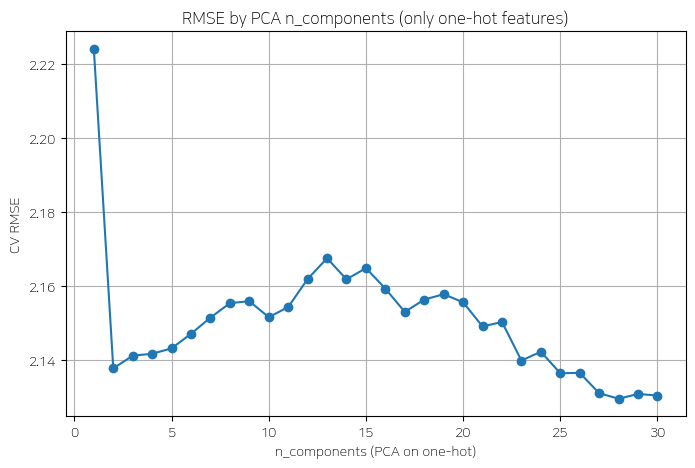

ÏµúÏ†Å n_components = 28, ÏµúÏÜå RMSE = 2.1295


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = train.drop(columns=["box_off_num"])
y = train["box_off_num"]

onehot_cols = [col for col in X.columns if 'genre_' in col or 'screening_rat_' in col or 'year_' in col or 'month_' in col]
numeric_cols = [col for col in X.columns if col not in onehot_cols]

X_cat = X[onehot_cols].copy()
X_num = X[numeric_cols].copy()

# 4. ÏàòÏπòÌòï ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 5. n_components Î∞òÎ≥µ Ïã§Ìóò
rmse_list = []
component_range = range(1, min(len(onehot_cols), 31))  # ÏµúÎåÄ 30Ï∞®ÏõêÍπåÏßÄ (ÎòêÎäî ÏõêÌï´ Ïàò ÎØ∏Îßå)

for n in component_range:
    pca = PCA(n_components=n)
    X_cat_pca = pca.fit_transform(X_cat)

    # Ìï©ÏπòÍ∏∞
    X_combined = np.concatenate([X_num_scaled, X_cat_pca], axis=1)

    # Î™®Îç∏ ÌõàÎ†® + ÍµêÏ∞®Í≤ÄÏ¶ù
    model = Ridge(alpha=1.0)
    scores = cross_val_score(model, X_combined, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    rmse_list.append(rmse)

# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(component_range, rmse_list, marker='o')
plt.xlabel("n_components (PCA on one-hot)")
plt.ylabel("CV RMSE")
plt.title("RMSE by PCA n_components (only one-hot features)")
plt.grid(True)
plt.show()

# 7. ÏµúÏ†Å Ï∞®Ïõê Ï∂úÎ†•
best_n = component_range[np.argmin(rmse_list)]
print(f"ÏµúÏ†Å n_components = {best_n}, ÏµúÏÜå RMSE = {min(rmse_list):.4f}")

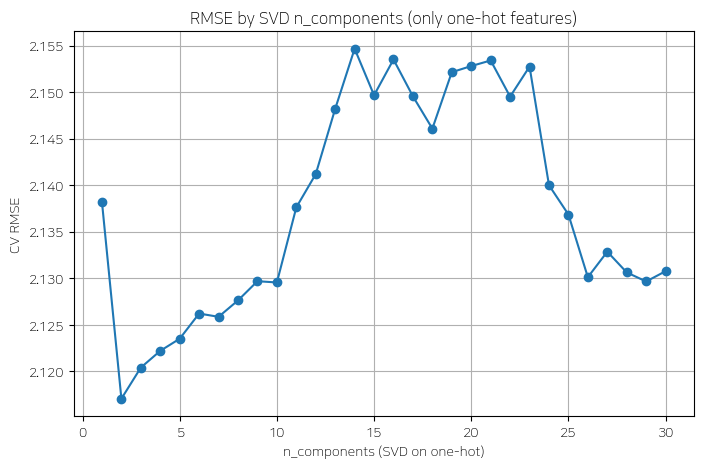

ÏµúÏ†Å n_components = 2, ÏµúÏÜå RMSE = 2.1171


In [ ]:
from sklearn.decomposition import TruncatedSVD

X = train.drop(columns=["box_off_num"])
y = train["box_off_num"]

onehot_cols = [col for col in X.columns if 'genre_' in col or 'screening_rat_' in col or 'year_' in col or 'month_' in col]
numeric_cols = [col for col in X.columns if col not in onehot_cols]

X_cat = X[onehot_cols].copy()
X_num = X[numeric_cols].copy()

# 4. ÏàòÏπòÌòï ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 5. n_components Î∞òÎ≥µ Ïã§Ìóò
rmse_list = []
component_range = range(1, min(len(onehot_cols), 31))  # ÏµúÎåÄ 30Ï∞®ÏõêÍπåÏßÄ (ÎòêÎäî ÏõêÌï´ Ïàò ÎØ∏Îßå)

for n in component_range:
    trunSVD = TruncatedSVD(n_components=n)
    X_cat_svd = trunSVD.fit_transform(X_cat)

    # Ìï©ÏπòÍ∏∞
    X_combined = np.concatenate([X_num_scaled, X_cat_svd], axis=1)

    # Î™®Îç∏ ÌõàÎ†® + ÍµêÏ∞®Í≤ÄÏ¶ù
    model = Ridge(alpha=1.0)
    scores = cross_val_score(model, X_combined, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    rmse_list.append(rmse)

# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(component_range, rmse_list, marker='o')
plt.xlabel("n_components (SVD on one-hot)")
plt.ylabel("CV RMSE")
plt.title("RMSE by SVD n_components (only one-hot features)")
plt.grid(True)
plt.show()

# 7. ÏµúÏ†Å Ï∞®Ïõê Ï∂úÎ†•
best_n = component_range[np.argmin(rmse_list)]
print(f"ÏµúÏ†Å n_components = {best_n}, ÏµúÏÜå RMSE = {min(rmse_list):.4f}")

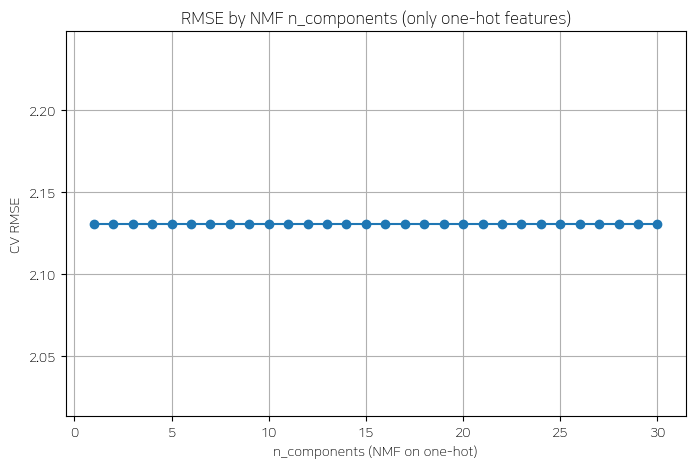

ÏµúÏ†Å n_components = 1, ÏµúÏÜå RMSE = 2.1308


In [ ]:
from sklearn.decomposition import NMF

X = train.drop(columns=["box_off_num"])
y = train["box_off_num"]

onehot_cols = [col for col in X.columns if 'genre_' in col or 'screening_rat_' in col or 'year_' in col or 'month_' in col]
numeric_cols = [col for col in X.columns if col not in onehot_cols]

X_cat = X[onehot_cols].copy()
X_num = X[numeric_cols].copy()

# 4. ÏàòÏπòÌòï ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 5. n_components Î∞òÎ≥µ Ïã§Ìóò
rmse_list = []
component_range = range(1, min(len(onehot_cols), 31))  # ÏµúÎåÄ 30Ï∞®ÏõêÍπåÏßÄ (ÎòêÎäî ÏõêÌï´ Ïàò ÎØ∏Îßå)

for n in component_range:
    nmf = NMF(n_components=n)
    X_cat_nmf = trunSVD.fit_transform(X_cat)

    # Ìï©ÏπòÍ∏∞
    X_combined = np.concatenate([X_num_scaled, X_cat_nmf], axis=1)

    # Î™®Îç∏ ÌõàÎ†® + ÍµêÏ∞®Í≤ÄÏ¶ù
    model = Ridge(alpha=1.0)
    scores = cross_val_score(model, X_combined, y, cv=5, scoring='neg_root_mean_squared_error')
    rmse = -scores.mean()
    rmse_list.append(rmse)

# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(component_range, rmse_list, marker='o')
plt.xlabel("n_components (NMF on one-hot)")
plt.ylabel("CV RMSE")
plt.title("RMSE by NMF n_components (only one-hot features)")
plt.grid(True)
plt.show()

# 7. ÏµúÏ†Å Ï∞®Ïõê Ï∂úÎ†•
best_n = component_range[np.argmin(rmse_list)]
print(f"ÏµúÏ†Å n_components = {best_n}, ÏµúÏÜå RMSE = {min(rmse_list):.4f}")

##### PCA, SVD (n_components=2) + ÎùºÏèò, Î¶øÏßÄ, ÏóòÎùºÏä§Ìã±ÎÑ∑, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, XGB, LGBM

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

# ÌÉÄÍ≤ü
y = train["box_off_num"]

# ÏûÖÎ†• ÌîºÏ≤ò
X = train.drop(columns=["box_off_num"])

# Î∂ÑÎ¶¨
onehot_cols = [col for col in X.columns if 'genre_' in col or 'screening_rat_' in col or 'year_' in col or 'month_' in col]
numeric_cols = [col for col in X.columns if col not in onehot_cols]

X_cat = X[onehot_cols]
X_num = X[numeric_cols]

# ÏàòÏπòÌòï Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# PCA Î∞è SVD (n_components=2)
pca = PCA(n_components=2)
X_cat_pca = pca.fit_transform(X_cat)

svd = TruncatedSVD(n_components=2)
X_cat_svd = svd.fit_transform(X_cat)

# ÏµúÏ¢Ö ÏûÖÎ†•
X_pca = np.concatenate([X_num_scaled, X_cat_pca], axis=1)
X_svd = np.concatenate([X_num_scaled, X_cat_svd], axis=1)

In [ ]:
from sklearn.model_selection import KFold

def evaluate_models(X_input, y):
    models = {
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1, max_iter=10000),
        "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=156, verbosity=0),
        "LightGBM": LGBMRegressor(n_estimators=100, random_state=156,verbose=-1),
    }

    results = {}

    for name, model in models.items():
        scores = cross_val_score(model, X_input, y, cv=5, scoring="neg_root_mean_squared_error")
        rmse = -scores.mean()
        results[name] = rmse
        print(f"{name}: RMSE = {rmse:.4f}")

    return results

In [ ]:
print("\n Results on PCA(n=2):")
results_pca = evaluate_models(X_pca, y)


 Results on PCA(n=2):
Ridge: RMSE = 2.1377
Lasso: RMSE = 2.1666
ElasticNet: RMSE = 2.1545
RandomForest: RMSE = 1.9322
XGBoost: RMSE = 2.0412
LightGBM: RMSE = 1.9800


In [ ]:
print("\n Results on SVD(n=2):")
results_svd = evaluate_models(X_svd, y)


 Results on SVD(n=2):
Ridge: RMSE = 2.1171
Lasso: RMSE = 2.1707
ElasticNet: RMSE = 2.1664
RandomForest: RMSE = 1.8813
XGBoost: RMSE = 2.0005
LightGBM: RMSE = 1.9792


##### SVD + Î™®Îç∏ Ï°∞Ìï©

1. Î¶øÏßÄ + ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ + LGBM

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Î™®Îç∏ Ï†ïÏùò
models = {
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=156, verbose=-1),
}

# ÏûÖÎ†• ÌîºÏ≤ò (SVD ÏÇ¨Ïö©)
X_input = X_svd
kf = KFold(n_splits=5, shuffle=True, random_state=156)

# Í∞Å foldÎßàÎã§ ÏòàÏ∏° Ï†ÄÏû•
model_preds = {name: np.zeros(len(y)) for name in models}

for train_idx, val_idx in kf.split(X_input):
    X_tr, X_val = X_input[train_idx], X_input[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    for name, model in models.items():
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        model_preds[name][val_idx] = preds

# Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_pred_avg = np.mean([model_preds[name] for name in models], axis=0)
mse_avg = mean_squared_error(y, ensemble_pred_avg)
rmse_avg = np.sqrt(mse_avg)

print(f"üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: {rmse_avg:.4f}")

üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: 1.9036


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_svd])
X_val_final = np.hstack([X_val_num, X_val_svd])
X_test_final = np.hstack([X_test_num, X_test_svd])

# 1. Î™®Îç∏ Ï†ïÏùò (Ïù¥Ï†ÑÏóê ÏçºÎçò Í≤ÉÍ≥º ÎèôÏùº)
models = {
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=156, verbose=-1),
}

# 2. Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ & ÌÖåÏä§Ìä∏ ÏòàÏ∏°
test_preds = []

for name, model in models.items():
    model.fit(X_train_final, y_train)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
    pred = model.predict(X_test_final)  # test ÏòàÏ∏° (Î°úÍ∑∏Í∞í ÏòàÏ∏°)
    test_preds.append(pred)

# 3. Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_pred_log = np.mean(test_preds, axis=0)

# 4. Î°úÍ∑∏ Î≥ÄÌôò Î≥µÏõê
ensemble_pred = np.expm1(ensemble_pred_log)

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ ÏµúÏ¢Ö ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º (ÏùºÎ∂Ä):")
print(ensemble_pred[:10])

‚úÖ ÏµúÏ¢Ö ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º (ÏùºÎ∂Ä):
[ 865562.98559505  334881.43609396  575222.42935775  851053.71166788
 1267307.43092104    5164.8250778     6422.37059436    1628.57521099
    5203.11465112  213643.21614351]


In [ ]:
submission['box_off_num'] = ensemble_pred
submission.to_csv('submission_ensemble.csv', index=False)

from google.colab import files
files.download('submission_ensemble.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàòÍ∞Ä ÎÑàÎ¨¥ ÎÜíÍ≤å ÎÇòÏò¥

2. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ + xgb + lgbm

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Î™®Îç∏ Ï†ïÏùò
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=156, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=156, verbose=-1),
}

# ÏûÖÎ†• ÌîºÏ≤ò (SVD ÏÇ¨Ïö©)
X_input = X_svd
kf = KFold(n_splits=5, shuffle=True, random_state=156)

# Í∞Å foldÎßàÎã§ ÏòàÏ∏° Ï†ÄÏû•
model_preds = {name: np.zeros(len(y)) for name in models}

for train_idx, val_idx in kf.split(X_input):
    X_tr, X_val = X_input[train_idx], X_input[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    for name, model in models.items():
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        model_preds[name][val_idx] = preds

# Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_pred_avg = np.mean([model_preds[name] for name in models], axis=0)
mse_avg = mean_squared_error(y, ensemble_pred_avg)
rmse_avg = np.sqrt(mse_avg)

print(f"üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: {rmse_avg:.4f}")

üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: 1.9438


3. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ + lgbm

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Î™®Îç∏ Ï†ïÏùò
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=156, verbose=-1),
}

# ÏûÖÎ†• ÌîºÏ≤ò (SVD ÏÇ¨Ïö©)
X_input = X_svd
kf = KFold(n_splits=5, shuffle=True, random_state=156)

# Í∞Å foldÎßàÎã§ ÏòàÏ∏° Ï†ÄÏû•
model_preds = {name: np.zeros(len(y)) for name in models}

for train_idx, val_idx in kf.split(X_input):
    X_tr, X_val = X_input[train_idx], X_input[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    for name, model in models.items():
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        model_preds[name][val_idx] = preds

# Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_pred_avg = np.mean([model_preds[name] for name in models], axis=0)
mse_avg = mean_squared_error(y, ensemble_pred_avg)
rmse_avg = np.sqrt(mse_avg)

print(f"üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: {rmse_avg:.4f}")

üîπ Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î RMSE: 1.9423


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_svd])
X_val_final = np.hstack([X_val_num, X_val_svd])
X_test_final = np.hstack([X_test_num, X_test_svd])

# 1. Î™®Îç∏ Ï†ïÏùò (Ïù¥Ï†ÑÏóê ÏçºÎçò Í≤ÉÍ≥º ÎèôÏùº)
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=156),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=156, verbose=-1),
}

# 2. Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ & ÌÖåÏä§Ìä∏ ÏòàÏ∏°
test_preds = []

for name, model in models.items():
    model.fit(X_train_final, y_train)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
    pred = model.predict(X_test_final)  # test ÏòàÏ∏° (Î°úÍ∑∏Í∞í ÏòàÏ∏°)
    test_preds.append(pred)

# 3. Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_pred_log = np.mean(test_preds, axis=0)

# 4. Î°úÍ∑∏ Î≥ÄÌôò Î≥µÏõê
ensemble_pred = np.expm1(ensemble_pred_log)

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ ÏµúÏ¢Ö ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º (ÏùºÎ∂Ä):")
print(ensemble_pred[:10])

‚úÖ ÏµúÏ¢Ö ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º (ÏùºÎ∂Ä):
[1.40767003e+06 2.82551828e+05 6.59743936e+05 1.02473765e+06
 1.92341207e+06 4.47060517e+03 6.12525792e+03 1.02891779e+03
 3.67184084e+03 3.68436709e+05]


##### SVD -> ÎûúÎç§Ìè¨Î†àÏä§Ìä∏

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_svd])
X_val_final = np.hstack([X_val_num, X_val_svd])
X_test_final = np.hstack([X_test_num, X_test_svd])

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ
rf = RandomForestRegressor(random_state=156)
rf.fit(X_train_final, y_train)

# 10. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è RMSE Ï∂úÎ†•
val_pred = rf.predict(X_val_final)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

# 11. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred_log = rf.predict(X_test_final)
# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê (Î°úÍ∑∏ Ïó≠Î≥ÄÌôò)
svd_test_pred = np.expm1(test_pred_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(svd_test_pred[:5])

Validation RMSE: 1.8552
Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[1607975.05333245  389117.97555797  536760.91897036 1093571.39057799
 1107303.42499871]


In [ ]:
submission['box_off_num'] = svd_test_pred
submission.to_csv('submission_svd.csv', index=False)

from google.colab import files
files.download('submission_svd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1458378.26318

##### SVD -> LightGBM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_svd])
X_val_final = np.hstack([X_val_num, X_val_svd])
X_test_final = np.hstack([X_test_num, X_test_svd])

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ
lgbm = LGBMRegressor(random_state=156)
lgbm.fit(X_train_final, y_train)

# 10. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è RMSE Ï∂úÎ†•
val_pred = lgbm.predict(X_val_final)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

# 11. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred_log = lgbm.predict(X_test_final)
# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê (Î°úÍ∑∏ Ïó≠Î≥ÄÌôò)
lgbm_test_pred = np.expm1(test_pred_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(lgbm_test_pred[:5])

Validation RMSE: 1.9681
Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[1232316.93766626  205170.43995852  810904.85199785  960236.5676757
 3341011.42500269]


In [ ]:
submission['box_off_num'] = lgbm_test_pred
submission.to_csv('submission_lgbm.csv', index=False)

from google.colab import files
files.download('submission_lgbm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1350596.1463791998

##### SVD -> XGBoost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_svd])
X_val_final = np.hstack([X_val_num, X_val_svd])
X_test_final = np.hstack([X_test_num, X_test_svd])

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ
xgb = XGBRegressor(random_state=156)
xgb.fit(X_train_final, y_train)

# 10. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è RMSE Ï∂úÎ†•
val_pred = xgb.predict(X_val_final)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

# 11. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred_log = xgb.predict(X_test_final)
# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê (Î°úÍ∑∏ Ïó≠Î≥ÄÌôò)
xgb_test_pred = np.expm1(test_pred_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(xgb_test_pred[:5])

Validation RMSE: 1.9484
Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[ 502098.    577924.06  956292.94  741164.2  3715110.2 ]


In [ ]:
submission['box_off_num'] = xgb_test_pred
submission.to_csv('submission_xgb.csv', index=False)

from google.colab import files
files.download('submission_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1567296.874522475

##### PCA -> LGBM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
pca = PCA(n_components=2, random_state=156)
pca.fit(X_train_onehot)

X_train_pca = pca.transform(X_train_onehot)
X_val_pca = pca.transform(X_val_onehot)
X_test_pca = pca.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_pca])
X_val_final = np.hstack([X_val_num, X_val_pca])
X_test_final = np.hstack([X_test_num, X_test_pca])

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ
lgbm = LGBMRegressor(random_state=156)
lgbm.fit(X_train_final, y_train)

# 10. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è RMSE Ï∂úÎ†•
val_pred = lgbm.predict(X_val_final)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

# 11. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred_log = lgbm.predict(X_test_final)
# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê (Î°úÍ∑∏ Ïó≠Î≥ÄÌôò)
lgbm_pca_test_pred = np.expm1(test_pred_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(lgbm_pca_test_pred[:5])

Validation RMSE: 2.0546
Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[ 807658.94021418  200014.4713613   842255.91201307  572796.70448175
 1565248.19657523]


In [ ]:
submission['box_off_num'] = lgbm_pca_test_pred
submission.to_csv('submission_lgbm_pca.csv', index=False)

from google.colab import files
files.download('submission_lgbm_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1503419

##### PCA -> RF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
pca = PCA(n_components=2, random_state=156)
pca.fit(X_train_onehot)

X_train_pca = pca.transform(X_train_onehot)
X_val_pca = pca.transform(X_val_onehot)
X_test_pca = pca.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final = np.hstack([X_train_num, X_train_pca])
X_val_final = np.hstack([X_val_num, X_val_pca])
X_test_final = np.hstack([X_test_num, X_test_pca])

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ
rf = RandomForestRegressor(random_state=156)
rf.fit(X_train_final, y_train)

# 10. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è RMSE Ï∂úÎ†•
val_pred = rf.predict(X_val_final)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

# 11. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred_log = rf.predict(X_test_final)
# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê (Î°úÍ∑∏ Ïó≠Î≥ÄÌôò)
rf_pca_test_pred = np.expm1(test_pred_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(rf_pca_test_pred[:5])

Validation RMSE: 1.8627
Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[1285185.4035871   501218.82523609  233482.62764689  818397.02834914
 1259284.80192801]


In [ ]:
submission['box_off_num'] = rf_pca_test_pred
submission.to_csv('submission_rf_pca.csv', index=False)

from google.colab import files
files.download('submission_rf_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1444832.347176336

#### **ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ**



In [ ]:
pip install hyperopt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X, y Î∂ÑÎ¶¨
X = train.drop(columns=['box_off_num'])
y = train['box_off_num'].values

# 3. train/validation Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ïòà: 8:2 ÎπÑÏú®)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156
)

# 4. ÏõêÌï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï (ÌïÑÏöîÏóê Îî∞Îùº ÏàòÏ†ï)
onehot_cols = [col for col in X.columns if
               col.startswith('genre_') or
               col.startswith('screening_rat_') or
               col.startswith('year_') or
               col.startswith('month_')]

# 5. ÏõêÌï´ ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_train_onehot = X_train[onehot_cols]
X_val_onehot = X_val[onehot_cols]
X_test_onehot = test[onehot_cols]

# 6. SVD Ï†ÅÏö© (n_components=2)
svd = TruncatedSVD(n_components=2, random_state=156)
svd.fit(X_train_onehot)

X_train_svd = svd.transform(X_train_onehot)
X_val_svd = svd.transform(X_val_onehot)
X_test_svd = svd.transform(X_test_onehot)

# 7. ÏàòÏπòÌòï ÌîºÏ≤ò Ï∂îÏ∂ú (ÏõêÌï´ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº)
num_cols = [col for col in X.columns if col not in onehot_cols]

X_train_num = X_train[num_cols].values
X_val_num = X_val[num_cols].values
X_test_num = test[num_cols].values

# 8. ÏàòÏπòÌòï ÌîºÏ≤ò + SVD Ï∞®ÏõêÏ∂ïÏÜå Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_final_svd = np.hstack([X_train_num, X_train_svd])
X_val_final_svd = np.hstack([X_val_num, X_val_svd])
X_test_final_svd = np.hstack([X_test_num, X_test_svd])

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# üìå ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
param_space = {
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.quniform('min_child_samples', 5, 100, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'n_estimators': 100  # Í≥†Ï†ï or ÌäúÎãù ÎåÄÏÉÅÏóê Ï∂îÍ∞Ä Í∞ÄÎä•
}

# üìå Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò (RMSE Í∏∞Ï§Ä)
def objective(params):
    # Ï†ïÏàòÌòï ÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÌôò
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_samples'] = int(params['min_child_samples'])

    model = LGBMRegressor(**params, random_state=156, verbose=-1)
    score = -cross_val_score(model, X_train_final_svd, y_train,
                             scoring="neg_root_mean_squared_error", cv=5).mean()

    return {'loss': score, 'status': STATUS_OK}

# üìå ÌÉêÏÉâ ÏàòÌñâ
trials = Trials()
best = fmin(fn=objective,
            space=param_space,
            algo=tpe.suggest,  # Tree-structured Parzen Estimator
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(42))

print("üéØ Best Hyperparameters:", best)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:10<00:00,  4.65trial/s, best loss: 1.9124589292324128]
üéØ Best Hyperparameters: {'colsample_bytree': np.float64(0.8104165716895848), 'learning_rate': np.float64(0.09014471888177232), 'max_depth': np.float64(12.0), 'min_child_samples': np.float64(46.0), 'num_leaves': np.float64(64.0), 'reg_alpha': np.float64(0.6741396008793589), 'reg_lambda': np.float64(0.6641624975844865), 'subsample': np.float64(0.6133265829153053)}


In [ ]:
from lightgbm import LGBMRegressor

# bestÎäî hyperopt Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨ (Î¨∏ÏûêÏó¥ ÌÇ§Ïóê Í∞íÏù¥ ÏûàÏùå)
# Ï†ïÏàòÌòïÏúºÎ°ú Ï∫êÏä§ÌåÖÏù¥ ÌïÑÏöîÌïú Í∞íÎì§ Î®ºÏ†Ä Î≥ÄÌôò
best_lgbm_params = {
    'num_leaves': int(best['num_leaves']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'min_child_samples': int(best['min_child_samples']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'reg_alpha': best['reg_alpha'],
    'reg_lambda': best['reg_lambda'],
    'n_estimators': 100,  # ÌïÑÏöî Ïãú Î≥ÄÍ≤Ω Í∞ÄÎä•
    'random_state': 42
}

# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
lgbm_model = LGBMRegressor(**best_lgbm_params)
lgbm_model.fit(X_train_final_svd, y_train)

# ÏòàÏ∏° ÏàòÌñâ
preds_log = lgbm_model.predict(X_test_final_svd)
svd_lgbm_test_pred = np.expm1(preds_log)

print("Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:")
print(svd_lgbm_test_pred[:5])

Test ÏòàÏ∏°Í∞í ÏùºÎ∂Ä:
[1042608.00790997  227339.79934243 1009910.65310991 1220843.9408181
 2764542.76891257]


In [ ]:
submission['box_off_num'] = svd_lgbm_test_pred
submission.to_csv('submission_svd_lgbm.csv', index=False)

from google.colab import files
files.download('submission_svd_lgbm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Ï†êÏàò: 1533122.6184283756

Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏßÑÌñâÌïú Î™®Îç∏ÎßÅ ÏµúÍ≥† Ï†êÏàò:

#### **ÏµúÏ¢Ö Í≤∞Î°†**

(1) PCA, SVD, NMF + Î¶øÏßÄÎ°ú ÏàòÌñâ Í≤∞Í≥º SVD Í∞Ä n_components=2 ÏóêÏÑú ÏµúÏÜå RMSE Í∞Ä Ï†úÏùº ÏûëÏïòÏùå. => SVD ÏÑ†ÌÉù

(2) SVD ÏàòÌñâ ÌõÑ, Î¶øÏßÄ, ÎùºÏèò, ÏóòÎùºÏä§Ìã±ÎÑ∑, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, XGB, LGBM ÎèåÎ†§Î¥Ñ

(3) SVD ÌõÑÏóê Îã§ÏñëÌïú Î™®Îç∏Îì§ÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏòàÏ∏°ÌñàÎçîÎãà Ïò§ÌûàÎ†§ ÏÑ±Îä• Îñ®Ïñ¥Ïßê.

(4) SVD ÌõÑ Î™®Îç∏ 1Í∞úÎ°ú ÏµúÏ¢Ö ÏòàÏ∏° Ïã§Ïãú => LGBM ÏÑ±Îä• Ï†úÏùº ÎÜíÏïòÏùå.

(5) LGBM ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî ÌõÑ ÌïôÏäµ Ïã§ÏãúÌï¥Î¥Ñ => ÌïòÏßÄÎßå, Ïò§ÌûàÎ†§ ÏÑ±Îä• Îñ®Ïñ¥Ïßê


**Í≤∞Î°†**

**TruncatdSVD (n_components) Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ, LightGBM ÏàòÌñâÏùò Í≤ΩÏö∞ ÏÑ±Îä•Ïù¥ Ï†úÏùº Ï¢ãÏïòÏùå. (1350596.15)**

## **Í≤∞Î°†**

- Stacking ÏµúÍ≥† Ï†êÏàò: 1551493.0510696012
- Blending ÏµúÍ≥† Ï†êÏàò: 1410308.82
- Ï∞®Ïõê Ï∂ïÏÜå ÏµúÍ≥† Ï†êÏàò: 1350596.1463791998

Îî∞ÎùºÏÑú TruncatedSVDÎ•º Ï†ÅÏö©ÌïòÏó¨ Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ, Light GBMÏùÑ Ï†ÅÏö©Ìïú Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.